Análisis de experimentos de entrenamiento

In [1]:
import pandas as pd
from ast import literal_eval
import seaborn as sns
import matplotlib.pyplot as plt
import re

import pingouin as pg
from statsmodels.graphics.factorplots import interaction_plot
import scikit_posthocs as sp
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.insert(0,"..")
from general_functions import *
from GA import *

In [2]:
def preprocess_data(data,option="f"):
    new_data = pd.DataFrame()
    new_data["score"] = data["full_name"].map(lambda x: x.split("_")[0])
    new_data["classize"] = data["full_name"].map(lambda x: x.split("_")[1].split("-")[1])
    new_data["instance"] = data["full_name"].map(lambda x: x.split("_")[2].split("-")[1])
    new_data["repetition"] = data["full_name"].map(lambda x: x.split("_")[3].split("-")[1])
    new_data["population_size"] = data["full_name"].map(lambda x: x.split("_")[4].split("-")[1])
    new_data["groupsize"] = data["full_name"].map(lambda x: x.split("_")[5].split("-")[1])
    new_data["best_fitness"] = data["best_fitness"]
    new_data["final_time"] = data["final_time"]
    new_data["optimal_solution"] = data["optimal_solution"]
    new_data["configuration"] = data["configuration"].map(lambda x: re.sub("RWS_","RWS-",x))
    new_data["configuration"] = new_data["configuration"].map(lambda x: re.sub("\)","",x)) +", "+ new_data["population_size"] + ")"
    new_data["full_name"] = data["full_name"]
    new_data["normalized_fitness"] = new_data["best_fitness"]/new_data["optimal_solution"]
    new_data["iterations"] = data["iterations"]
    
    if option == "it":
        new_data = new_data.groupby(by=["instance","configuration","iterations"]).mean().reset_index()
    elif option == "r":
        return new_data
    else:
        new_data = new_data.groupby(by=["instance","configuration"]).mean().reset_index()
    return new_data

In [3]:
route = "training_data/"
datalist_names = ["belbin-20-3to5","belbin-30-3to5","belbin-40-3to5",
                  "belbin-20-4to4", "belbin-20-5to5","belbin-30-3to3",
                  "belbin-30-5to5","belbin-40-4to4","belbin-40-5to5",
                  "belbin-60-3to3","belbin-60-4to4",
                  "mbti-20-3to5","mbti-30-3to5","mbti-40-3to5",
                  "mbti-20-4to4", "mbti-20-5to5","mbti-30-3to3",
                  "mbti-30-5to5","mbti-40-4to4","mbti-40-5to5",
                  "mbti-60-3to3","mbti-60-4to4"]
datalist_final = []
datalist_it = []
all_final_raw = []
for name in datalist_names:
    route2 = route+name+"-training_experiments_"
    route_final = route2 + "final.csv"
    route_it = route2 + "it.csv"
    df,dit = pd.read_csv(route_final),pd.read_csv(route_it)
    datalist_final.append(preprocess_data(df))
    datalist_it.append(preprocess_data(dit,option="it"))
    all_final_raw.append(preprocess_data(df,option="r"))
    # datalist_final.append(pd.read_csv(route_final))
    # datalist_it.append(pd.read_csv(route_it))

Análisis cualitativo de las soluciones obtenidas

In [ ]:
# b = pd.read_csv("datosGA/mbti-20-4to4-training_experiments_final.csv")
# b["pop"] = b["final_population"].map(literal_eval)

In [4]:
from sklearn.preprocessing import MinMaxScaler
for d in all_final_raw:
    scaler = MinMaxScaler()
    d["minmaxtime"] = scaler.fit_transform(d["final_time"].values.reshape(-1,1))
aa = pd.concat(all_final_raw)
aa["clasif1"] = aa["score"] + "-classize_" + aa["classize"].astype(str) + "-groupsize_" + aa["groupsize"]
aa["isoptimal"] = aa["normalized_fitness"].map(lambda x: 1 if x >= 1 else 0)

Análisis del número de soluciones obtenidas

Soluciones óptimas totales: 151237
Ejecuciones totales: 188160
0.8037680697278912


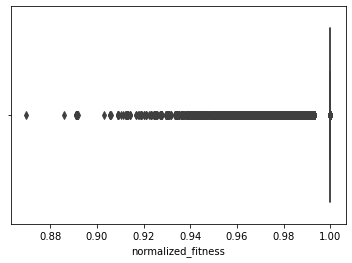

In [5]:
print(f"Soluciones óptimas totales: {sum(aa['isoptimal'])}")
print(f"Ejecuciones totales: {aa.shape[0]}")
print(sum(aa['isoptimal'])/aa.shape[0])
sns.boxplot(x="normalized_fitness",data=aa)
plt.show()

MultiIndex([('isoptimal',   'sum'),
            ('isoptimal', 'count')],
           )


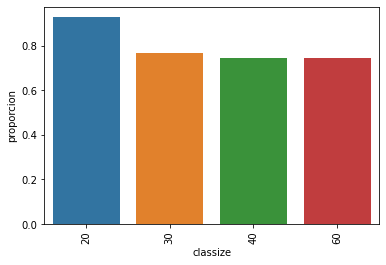

<AxesSubplot:xlabel='normalized_fitness', ylabel='classize'>

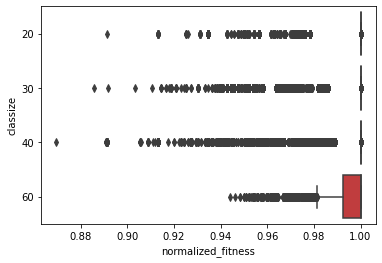

In [6]:
aa_clasif = aa[["classize","isoptimal"]]
aa_clasif = aa_clasif.groupby(by=["classize"]).agg({"sum","count"})
print(aa_clasif.columns)
aa_clasif.columns = ["suma","cuenta"]
aa_clasif.reset_index(inplace=True)
aa_clasif["proporcion"] = aa_clasif["suma"]/aa_clasif["cuenta"]

sns.barplot(x="classize",y="proporcion",data=aa_clasif)
plt.xticks(rotation=90)
plt.show()
sns.boxplot(x="normalized_fitness",y="classize",data=aa)

In [7]:
aa_clasif = aa[["clasif1","isoptimal","normalized_fitness"]]
aa_clasif = aa_clasif.groupby(by=["clasif1"]).agg({"sum","count"})
print(aa_clasif.columns)
aa_clasif.columns = ["suma","cuenta"]
aa_clasif.reset_index(inplace=True)
aa_clasif["proporcion"] = aa_clasif["suma"]/aa_clasif["cuenta"]

MultiIndex([(         'isoptimal',   'sum'),
            (         'isoptimal', 'count'),
            ('normalized_fitness',   'sum'),
            ('normalized_fitness', 'count')],
           )


ValueError: Length mismatch: Expected axis has 4 elements, new values have 2 elements

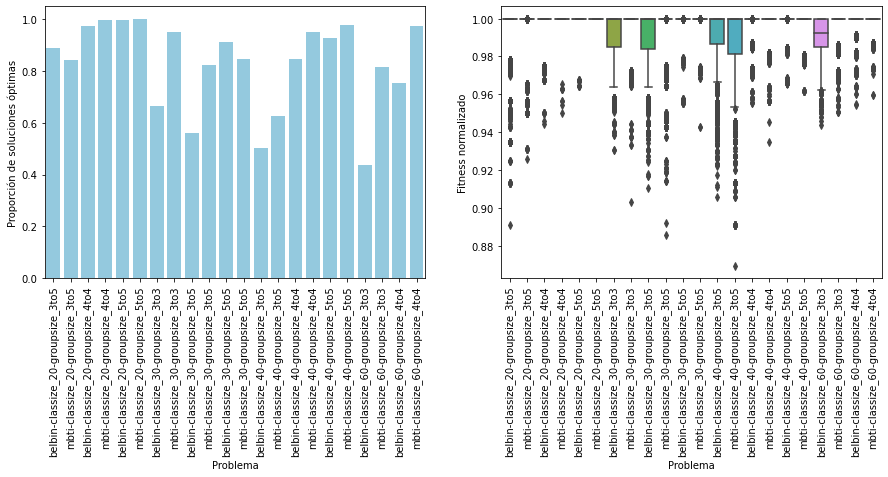

In [ ]:
orden = ['belbin-classize_20-groupsize_3to5',
'mbti-classize_20-groupsize_3to5',
 'belbin-classize_20-groupsize_4to4',
'mbti-classize_20-groupsize_4to4',
 'belbin-classize_20-groupsize_5to5',
  'mbti-classize_20-groupsize_5to5',
 'belbin-classize_30-groupsize_3to3',
'mbti-classize_30-groupsize_3to3',
 'belbin-classize_30-groupsize_3to5',
 'mbti-classize_30-groupsize_3to5',
 'belbin-classize_30-groupsize_5to5',
 'mbti-classize_30-groupsize_5to5',
 'belbin-classize_40-groupsize_3to5',
 'mbti-classize_40-groupsize_3to5',
 'belbin-classize_40-groupsize_4to4',
 'mbti-classize_40-groupsize_4to4',
 'belbin-classize_40-groupsize_5to5',
 'mbti-classize_40-groupsize_5to5',
 'belbin-classize_60-groupsize_3to3',
 'mbti-classize_60-groupsize_3to3',
 'belbin-classize_60-groupsize_4to4',
 'mbti-classize_60-groupsize_4to4']
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x="clasif1",y="proporcion",data=aa_clasif,color="skyblue",order=orden)
plt.xticks(rotation=90)
plt.xlabel("Problema")
plt.ylabel("Proporción de soluciones óptimas")
plt.subplot(122)
sns.boxplot(x="clasif1",y="normalized_fitness",data=aa,order=orden)
plt.xticks(rotation=90)
plt.xlabel("Problema")
plt.ylabel("Fitness normalizado")
plt.show()

In [19]:
# aa_clasif

# aa_clasif_m = aa[["clasif1","isoptimal","normalized_fitness","final_time"]]
# aa_clasif_m = aa_clasif_m.groupby(by=["clasif1"]).mean()
# aa_clasif_m

<AxesSubplot:xlabel='groupsize', ylabel='proporcion'>

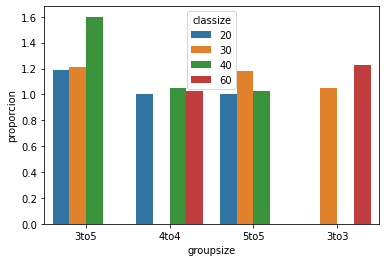

In [ ]:
e = aa[["clasif1","groupsize","classize","score"]].drop_duplicates()
aa_clasif2 = aa_clasif.merge(e,how="left",on="clasif1")
sns.barplot(x="groupsize",y="proporcion",hue="classize",data=aa_clasif2[aa_clasif2["score"]=="mbti"])

In [ ]:
print(f"Duración: {sum(aa['final_time'])} segundos")
print(f"Duración: {sum(aa['final_time'])/60} minutos")
print(f"Duración: {sum(aa['final_time'])/3600} horas")
print(f"Duración: {sum(aa['final_time'])/(3600*24)} días")

Duración: 2884432.492217779 segundos
Duración: 48073.87487029632 minutos
Duración: 801.231247838272 horas
Duración: 33.38463532659467 días


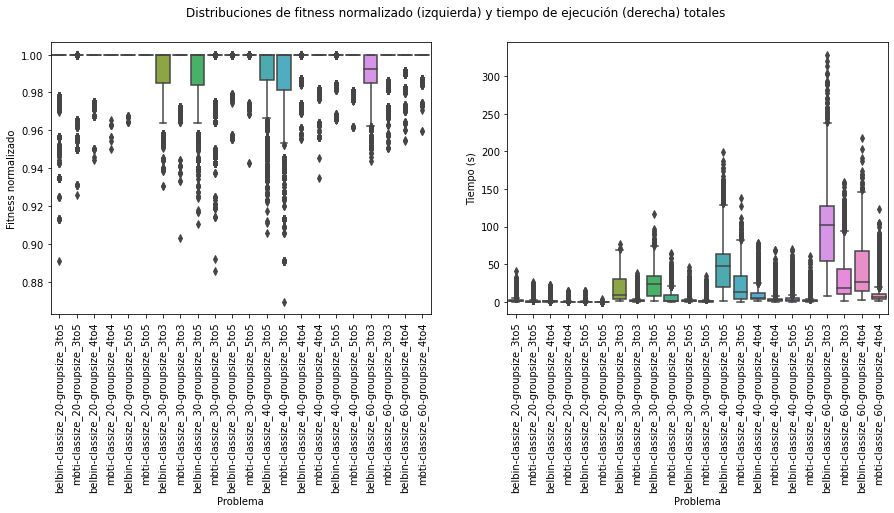

In [ ]:
plt.figure(figsize=(15,5))
plt.suptitle("Distribuciones de fitness normalizado (izquierda) y tiempo de ejecución (derecha) totales")
plt.subplot(121)
sns.boxplot(x="clasif1",y="normalized_fitness",data=aa,order=orden)
plt.xticks(rotation=90)
plt.xlabel("Problema")
plt.ylabel("Fitness normalizado")
plt.subplot(122)
sns.boxplot(x="clasif1",y="final_time",data=aa,order=orden)
plt.xticks(rotation=90)
plt.xlabel("Problema")
plt.ylabel("Tiempo (s)")
plt.show()
plt.show()

In [10]:
def plot_sorted_distribution(data,variable,normal=False):
    if variable == "normalized_fitness":
        nombre = "Promedio de fitness normalizado"
        asc = True
    else:
        nombre = "Promedio de tiempo"
        asc = False

    if normal:
        agg = data.groupby("configuration").mean().sort_values(by=variable,ascending=asc).reset_index()
    else:
        agg = data.groupby("configuration").mean().sort_values(by=variable,ascending=asc).reset_index()
    plt.figure(figsize=(10,15))
   
    plt.title(f"Distribuciones del {nombre.lower()} para las configuraciones")
    sns.boxplot(x=variable,y="configuration",data=data,order=list(agg["configuration"]))
    plt.xlabel(nombre)
    plt.ylabel("Configuración")
    plt.show()
        
def plot_iteration_convergence(data,configurations):
    subset = data[data["configuration"].isin(configurations)]
    sns.lineplot(x="iterations",y="normalized_fitness",data=subset,hue="configuration")
    plt.xlabel("Iteraciones")
    plt.ylabel("Promedio fitness normalizado")
    plt.title("Gráfico de convergencia")
    plt.legend(title="Configuración",bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [13]:
from scipy import stats
def assumptions(data,variable="normalized_fitness"):
    configurations = pd.unique(data["configuration"])
    non_normals = []
    for configuration in configurations:
        filtered_data = data[data["configuration"]==configuration]
        score_time = filtered_data[variable]
        normal_pvalue = round(stats.shapiro(score_time)[1],3)
        if normal_pvalue < 0.05:
            non_normals.append(configuration)
    print(f"Número de distribuciones no normales: {len(non_normals)} de {len(configurations)}")
    esphericity = pg.sphericity(data = data, dv = variable, within = "configuration", subject = "instance")
    print(esphericity)
    if len(non_normals)>0 or esphericity[4]<0.05:
        parametric = False
    else:
        parametric = True
    return parametric,non_normals

def nemenyi_friedman_equals(data,variable,best_conf_fit):
    confs = list(pd.unique(data["configuration"]))
    l,c = [],[]
    for conf in confs:
        f = data[data["configuration"]==conf]
        l.append(list(f[variable]))
        c.append(conf)

    data = np.array(l)
    matrix = sp.posthoc_nemenyi_friedman(data.T)
    row_of_best = matrix[confs.index(best_conf_fit)]
    equal_confs = [confs[i] for i in np.where(row_of_best>=0.05)[0]]
    return equal_confs

def analysis(data):
    print("Fitness")
    parametric, non_normals = assumptions(data,variable="normalized_fitness")
    if parametric == "hola": #if parametric
        pass
    else:
        agg = data.groupby("configuration").mean().sort_values(by="normalized_fitness",ascending=True).reset_index()
        aoa = agg.iloc[-1][["configuration","normalized_fitness"]]
        best_conf_fit = aoa["configuration"]
        try:
            rf = pg.friedman(data = data, dv = "normalized_fitness", within = "configuration", subject = "instance")
            print(f"Resultado Friedman fitness: p-value = {rf['p-unc'][0]}")

            pairs = pg.pairwise_ttests(data = data, dv = "normalized_fitness", within = "configuration", subject = "instance",parametric=False)
            pairs_best_in = pairs[(pairs["A"]==best_conf_fit)|(pairs["B"]==best_conf_fit)] #escogemos pares en los que la mejor conf esté en alguno
            pairs_best_in_nodiffs = pairs_best_in[pairs_best_in["p-unc"]>=0.05] #buscamos que no haya diferencias
            selected = agg[(agg["configuration"].isin(pairs_best_in_nodiffs["A"]))|(agg["configuration"].isin(pairs_best_in_nodiffs["B"]))]
            print("Wilcoxon post hoc")
        except:
            print("Nemenyi-Friedman Post hoc")
            pairs_best_in_nodiffs = nemenyi_friedman_equals(data,"normalized_fitness",best_conf_fit=best_conf_fit)
            selected = agg[agg["configuration"].isin(pairs_best_in_nodiffs)]
        if selected.shape[0] == 1:
            return best_conf_fit
        print("-----------------\nTime")

        data2 = data[data["configuration"].isin(selected["configuration"])]
        parametric,non_normals = assumptions(data2,"final_time")
        if parametric:
            pass
        else:
            agg2 = data2.groupby("configuration").mean().sort_values(by="final_time",ascending=False).reset_index()
            aoa2 = agg2.iloc[-1][["configuration","final_time"]]
            best_timer = aoa2["configuration"]
            rf = pg.friedman(data = data2, dv = "final_time", within = "configuration", subject = "instance")
            print(f"Resultado Friedman fitness: p-value = {rf['p-unc'][0]}")

            pairs2 = pg.pairwise_ttests(data = data2, dv = "final_time", within = "configuration", subject = "instance",parametric=False)
            pairs_best_in2 = pairs2[(pairs2["A"]==best_timer)|(pairs2["B"]==best_timer)]
            # pairs_best_in_diffs2 = pairs_best_in2[pairs_best_in2["p-unc"]<0.05]
            pairs_best_in_nodiffs2 = pairs_best_in2[pairs_best_in2["p-unc"]>=0.05]
            full_filtro = data[(data["configuration"].isin(pairs_best_in_nodiffs2["A"]))|(data["configuration"].isin(pairs_best_in_nodiffs2["B"]))]
    return agg,selected,agg2,full_filtro

### GLOBAL

In [26]:
aa["clasif2"] = aa["clasif1"] + aa["instance"]

In [27]:
aa_global = aa.groupby(["clasif2","configuration"]).mean().reset_index()

In [28]:
agg = aa_global.groupby("configuration").mean().sort_values(by="normalized_fitness",ascending=True).reset_index()
aoa = agg.iloc[-1][["configuration","normalized_fitness"]]
best_conf_fit = aoa["configuration"]

rf = pg.friedman(data = aa_global, dv = "normalized_fitness", within = "configuration", subject = "clasif2")
print(f"Resultado Friedman fitness: p-value = {rf['p-unc'][0]}")

pairs = pg.pairwise_ttests(data = aa_global, dv = "normalized_fitness", within = "configuration", subject = "clasif2",parametric=False)
pairs_best_in = pairs[(pairs["A"]==best_conf_fit)|(pairs["B"]==best_conf_fit)] #escogemos pares en los que la mejor conf esté en alguno
pairs_best_in_nodiffs = pairs_best_in[pairs_best_in["p-unc"]>=0.05] #buscamos que no haya diferencias
selected = agg[(agg["configuration"].isin(pairs_best_in_nodiffs["A"]))|(agg["configuration"].isin(pairs_best_in_nodiffs["B"]))]
print("Wilcoxon post hoc")


Resultado Friedman fitness: p-value = 0.0
Wilcoxon post hoc


In [29]:
selected

configuration  best_fitness  \
40  ('NWOX', 0.7, 'InheritMask', 'SS', 0.4, 'Rando...      5.931746   
41  ('CX', 0.9, 'InheritMask', 'SS', 0.4, 'Randomi...      5.932341   
42  ('CX', 0.9, 'InheritMask', 'SS', 0.4, 'Randomi...      5.932341   
43  ('NWOX', 0.7, 'InheritMask', 'SS', 0.4, 'Rando...      5.932341   
44  ('CX', 0.7, 'InheritMask', 'SS', 0.4, 'Randomi...      5.933829   
45  ('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'Rando...      5.932639   
46  ('CX', 0.7, 'InheritMask', 'SS', 0.4, 'Randomi...      5.933631   
47  ('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'Rando...      5.934226   
57  ('CX', 0.9, 'InheritMask', 'SS', 0.4, 'Divisio...      6.520184   
58  ('NWOX', 0.7, 'InheritMask', 'SS', 0.4, 'Divis...      6.519724   
59  ('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'Divis...      6.519778   
61  ('NWOX', 0.7, 'InheritMask', 'SS', 0.4, 'Divis...      6.519859   
62  ('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'Divis...      6.520319   
63  ('CX', 0.7, 'InheritMask', 'SS', 0.4, 'Divisio...      6.521429   

    final_time  optimal_solution  normalized_fitness  iterations  minmaxtime  \
40   11.980511          5.949405            0.997410   40.132540    0.098533   
41   11.479923          5.949405            0.997489   36.257143    0.102250   
42   11.856168          5.949405            0.997517   36.558730    0.102420   
43   12.380033          5.949405            0.997549   41.474603    0.101901   
44   11.102376          5.949405            0.997638   35.931746    0.097486   
45   10.033540          5.949405            0.997646   33.988095    0.084421   
46   11.534410          5.949405            0.997687   36.779365    0.098781   
47    9.602221          5.949405            0.997855   32.563492    0.080687   
57    9.568974          6.528139            0.999043   21.975108    0.070134   
58   13.069209          6.528139            0.999046   30.309957    0.085896   
59    9.343367          6.528139            0.999061   22.864935    0.064194   
61   12.843505          6.528139            0.999088   29.969048    0.085156   
62    9.293632          6.528139            0.999101   22.783983    0.064019   
63   10.778722          6.528139            0.999188   24.382251    0.076883   

    isoptimal  
40   0.855556  
41   0.847619  
42   0.846032  
43   0.847619  
44   0.864286  
45   0.846825  
46   0.859524  
47   0.863492  
57   0.928355  
58   0.924242  
59   0.925325  
61   0.927706  
62   0.927273  
63   0.937879

In [30]:
data2 = aa_global[aa_global["configuration"].isin(selected["configuration"])]


In [32]:
agg2 = data2.groupby("configuration").mean().sort_values(by="minmaxtime",ascending=False).reset_index()
aoa2 = agg2.iloc[-1][["configuration","minmaxtime"]]
best_timer = aoa2["configuration"]
rf = pg.friedman(data = data2, dv = "minmaxtime", within = "configuration", subject = "clasif2")
print(f"Resultado Friedman fitness: p-value = {rf['p-unc'][0]}")


Resultado Friedman fitness: p-value = 6.517419828324293e-47


In [33]:

pairs2 = pg.pairwise_ttests(data = data2, dv = "minmaxtime", within = "configuration", subject = "clasif2",parametric=False)
pairs_best_in2 = pairs2[(pairs2["A"]==best_timer)|(pairs2["B"]==best_timer)]
# pairs_best_in_diffs2 = pairs_best_in2[pairs_best_in2["p-unc"]<0.05]
pairs_best_in_nodiffs2 = pairs_best_in2[pairs_best_in2["p-unc"]>=0.05]
full_filtro = aa[(aa["configuration"].isin(pairs_best_in_nodiffs2["A"]))|(aa["configuration"].isin(pairs_best_in_nodiffs2["B"]))]


In [34]:
pd.unique(full_filtro["configuration"])

array(["('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.7, 'InheritMask', 'SS', 0.4, 'RandomisedMasking', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('CX', 0.7, 'InheritMask', 'SS', 0.4, 'RandomisedMasking', 'RWS-sp-1.5', 'EL', 50)"],
      dtype=object)

### Belbin 20 3-5

In [ ]:
index = datalist_names.index("belbin-20-3to5")
fdata, idata = datalist_final[index],datalist_it[index]
agg,selected,agg2,full_filtro = analysis(fdata)

Fitness
Número de distribuciones no normales: 64 de 64
SpherResults(spher=False, W=inf, chi2=inf, dof=2015, pval=0.0)
Resultado Friedman fitness: p-value = 7.343806570196184e-103
Nemenyi-Friedman Post hoc
-----------------
Time
Número de distribuciones no normales: 55 de 55
SpherResults(spher=True, W=2.6748368211937623e-16, chi2=65.51735827659711, dof=1484, pval=1.0)
Resultado Friedman fitness: p-value = 3.906021517654762e-74


In [ ]:
pd.unique(full_filtro["configuration"])

array(["('NWOX', 0.9, 'InheritMask', 'RSM', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.2, 'RandomisedMasking', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.2, 'RandomisedMasking', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'RandomisedMasking', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'RandomisedMasking', 'RWS-sp-1.5', 'EL', 50)"],
      dtype=object)

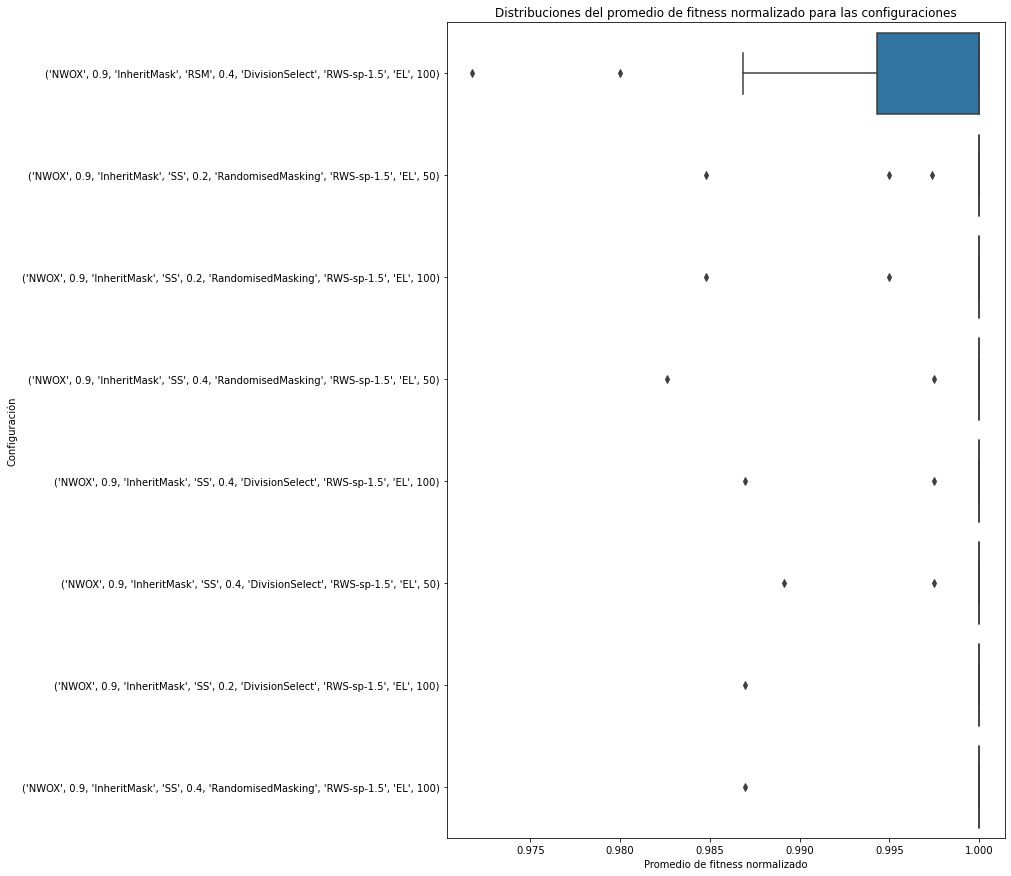

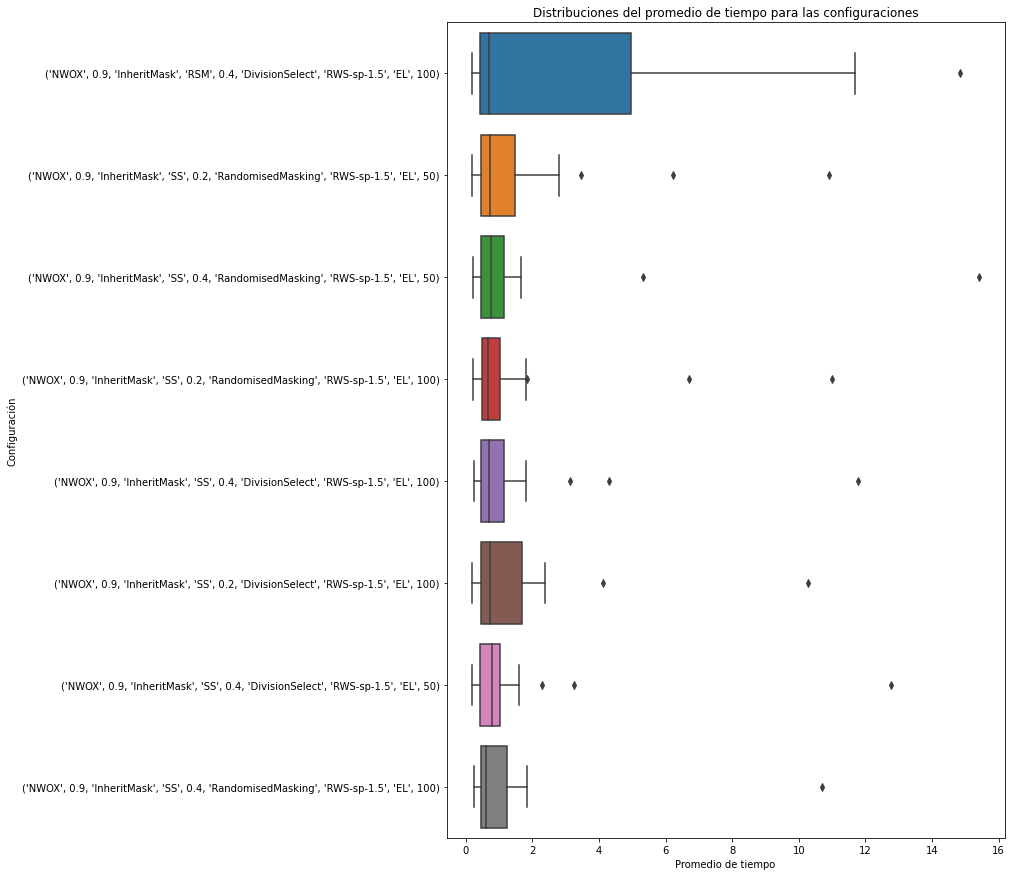

In [ ]:
# plot_sorted_distribution(fdata,"normalized_fitness",normal=False)
# plot_sorted_distribution(fdata,"final_time",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(selected["configuration"])],"normalized_fitness",normal=False)
plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"normalized_fitness",normal=False)
plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"final_time",normal=False)

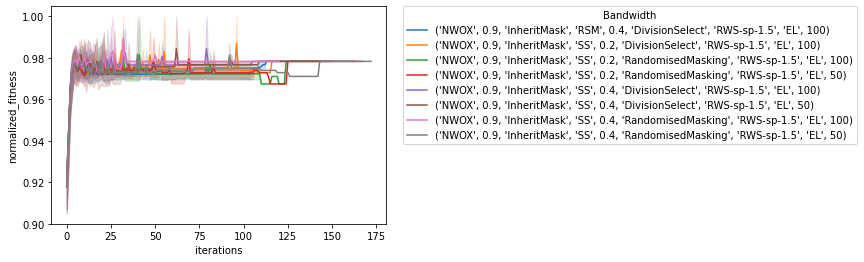

In [ ]:
plot_iteration_convergence(idata,
list(pd.unique(full_filtro["configuration"])))

In [ ]:
# selected
# agg
# agg2
agg2[agg2["configuration"].isin(full_filtro["configuration"])]
agg2[agg2["configuration"].isin(full_filtro["configuration"])].iloc[-1][0]

"('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'RandomisedMasking', 'RWS-sp-1.5', 'EL', 100)"

#### Mejor configuración Belbin 20 3-5. 
"('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'RandomisedMasking', 'RWS-sp-1.5', 'EL')-100".  
Conclusiones del análisis:  
Al principio hay pocas diferencias significativas en los fitness normalizados medios obtenidos (son todos muy altos a excepción de 5 configuraciones) por lo que la decisión principal se ha basado en el tiempo. Existen configuraciones relativamente lentas (muchas de ellas contienen el cruce CX) y al comparar la que mejor tiempo presenta con las otras vemos que unas 8 mantienen tiempos similares. En general son configuraciones repetidas a excepción del tamaño de la población, y vemos que todas comparten el método de cruce (NWOX) y su probabilidad (0.9) y prácticamente la mayoría usa SimpleSwap (es razonable ya que es más simple que RSM).
Viendo gráficos de convergencia vemos comportamientos de todo tipo, aunque por ejemplo la línea de color rosa parece llegar más arriba para pocas iteraciones, mientras que la roja o verde han necesitado en algún caso más iteraciones antes de devolver la solución. En conclusión, nos quedamos con la rosa por este hecho, además de que presenta mediana de fitness promedio de 1 (aunque esto pasa con otros) y además la mejor mediana de tiempo promedio.

https://stackoverflow.com/questions/65225316/python-pingouin-valueerror-zero-method-wilcox-and-pratt-do-not-work-if 

### Belbin 30 3-5

Este es el ejemplo comentado de la memoria. Primero almacenamos en unas variables los datos necesarios:

In [8]:
index = datalist_names.index("belbin-30-3to5")
fdata, idata = datalist_final[index],datalist_it[index]

Análisis enfocado en primer lugar en obtener la mejor solución, y una vez eso, ver qué configuración la obtiene en mejor tiempo. (explicar un poco más en detalle la justificación de esto).
En primer lugar, hemos de comprobar las asunciones de normalidad y esfericidad en los datos para poder llevar a cabo un test de anovas repetidas, vemos pues las distribuciones de los datos y computamos los test de Shapiro-Wilk y el otro.

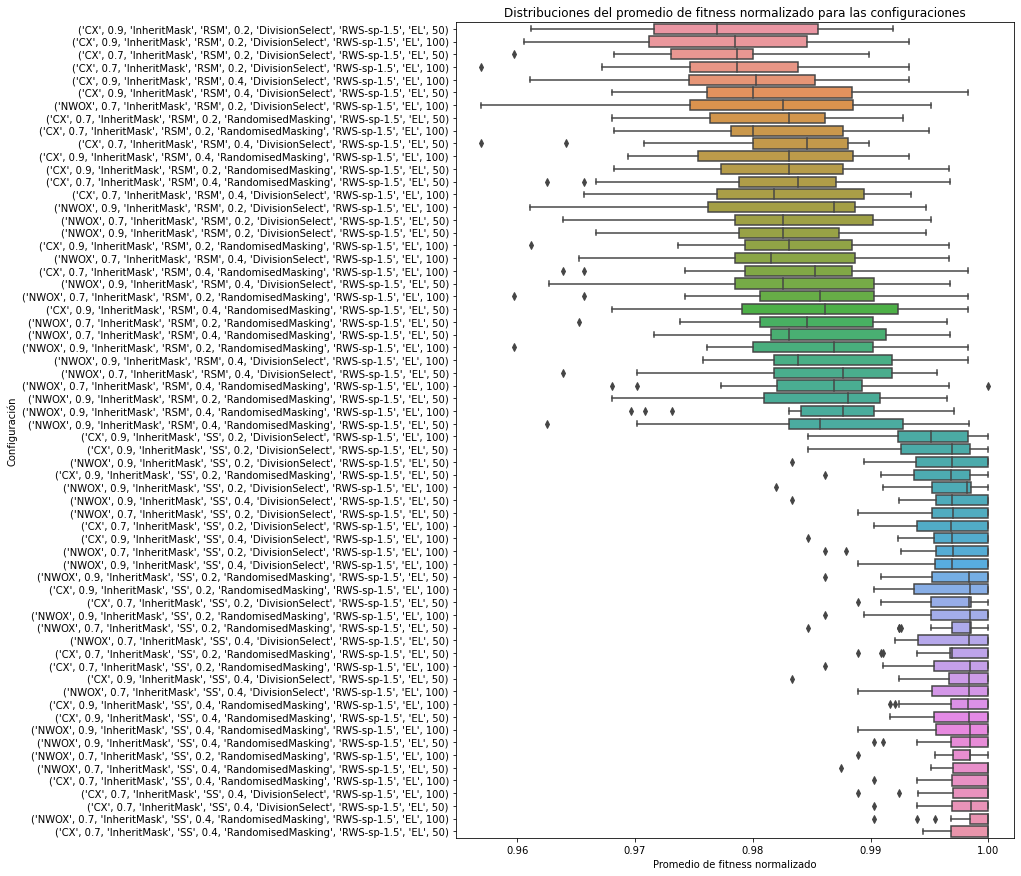

In [11]:
plot_sorted_distribution(fdata,"normalized_fitness",normal=False)

In [14]:
parametric, non_normals = assumptions(fdata,"normalized_fitness")

Número de distribuciones no normales: 36 de 64
SpherResults(spher=False, W=inf, chi2=inf, dof=2015, pval=0.0)


In [15]:
#al haber distribuciones no normales nos fijamos en la mediana en vez de la media para la referencia de
#las mejores soluciones
agg = fdata.groupby("configuration").mean().sort_values(by="normalized_fitness",ascending=True).reset_index()
aoa = agg.iloc[-1][["configuration","normalized_fitness"]]
best_conf_fit = aoa["configuration"]
aoa["configuration"],aoa["normalized_fitness"]

("('CX', 0.7, 'InheritMask', 'SS', 0.4, 'RandomisedMasking', 'RWS-sp-1.5', 'EL', 50)",
 0.9987101816113444)

In [16]:
#hacemos un test no paramétrico, el cual muestra que sí existen diferencias significativas
# rm_aov = pg.rm_anova(data = fdata, dv = "normalized_fitness", within = "configuration", subject = "instance", detailed = True, correction = "auto")
pg.friedman(data = fdata, dv = "normalized_fitness", within = "configuration", subject = "instance")

Source         W  ddof1            Q          p-unc
Friedman  configuration  0.824466     63  1090.768814  2.946780e-187

In [17]:
#comparaciones post-hoc
pairs = pg.pairwise_ttests(data = fdata, dv = "normalized_fitness", within = "configuration", subject = "instance",parametric=False)
pairs_best_in = pairs[(pairs["A"]==best_conf_fit)|(pairs["B"]==best_conf_fit)] #escogemos pares en los que la mejor conf esté en alguno
# pairs_best_in_diffs = pairs_best_in[pairs_best_in["p-unc"]<0.05]
pairs_best_in_nodiffs = pairs_best_in[pairs_best_in["p-unc"]>=0.05] #buscamos que no haya diferencias
pairs_best_in_nodiffs

Contrast                                                  A  \
692  configuration  ('CX', 0.7, 'InheritMask', 'SS', 0.4, 'Divisio...   
742  configuration  ('CX', 0.7, 'InheritMask', 'SS', 0.4, 'Divisio...   
791  configuration  ('CX', 0.7, 'InheritMask', 'SS', 0.4, 'Randomi...   
870  configuration  ('CX', 0.7, 'InheritMask', 'SS', 0.4, 'Randomi...   
871  configuration  ('CX', 0.7, 'InheritMask', 'SS', 0.4, 'Randomi...   

                                                     B  Paired  Parametric  \
692  ('CX', 0.7, 'InheritMask', 'SS', 0.4, 'Randomi...    True       False   
742  ('CX', 0.7, 'InheritMask', 'SS', 0.4, 'Randomi...    True       False   
791  ('CX', 0.7, 'InheritMask', 'SS', 0.4, 'Randomi...    True       False   
870  ('NWOX', 0.7, 'InheritMask', 'SS', 0.4, 'Rando...    True       False   
871  ('NWOX', 0.7, 'InheritMask', 'SS', 0.4, 'Rando...    True       False   

     W-val alternative     p-unc    hedges  
692    6.0   two-sided  0.204894 -0.210203  
742   13.0   two-sided  0.286321 -0.184122  
791   20.0   two-sided  0.475246 -0.227585  
870   16.0   two-sided  0.833635  0.081473  
871    3.0   two-sided  0.075927  0.250003

In [18]:
selected = agg[(agg["configuration"].isin(pairs_best_in_nodiffs["A"]))|(agg["configuration"].isin(pairs_best_in_nodiffs["B"]))]
selected

configuration  best_fitness  \
58  ('NWOX', 0.7, 'InheritMask', 'SS', 0.4, 'Rando...      7.936310   
59  ('CX', 0.7, 'InheritMask', 'SS', 0.4, 'Randomi...      7.936905   
60  ('CX', 0.7, 'InheritMask', 'SS', 0.4, 'Divisio...      7.936905   
61  ('CX', 0.7, 'InheritMask', 'SS', 0.4, 'Divisio...      7.938095   
62  ('NWOX', 0.7, 'InheritMask', 'SS', 0.4, 'Rando...      7.939881   
63  ('CX', 0.7, 'InheritMask', 'SS', 0.4, 'Randomi...      7.941667   

    final_time  optimal_solution  normalized_fitness  iterations  
58   14.228795          7.952381            0.998067   51.861905  
59   13.605176          7.952381            0.998160   48.371429  
60   15.759039          7.952381            0.998163   56.757143  
61   15.136110          7.952381            0.998289   54.280952  
62   14.039389          7.952381            0.998519   51.071429  
63   13.456100          7.952381            0.998710   47.833333

In [19]:
fdata2 = fdata[fdata["configuration"].isin(selected["configuration"])]
non_normals = assumptions(fdata2,"final_time")

Número de distribuciones no normales: 3 de 6
SpherResults(spher=True, W=0.35831930251721844, chi2=18.576587183539967, dof=14, pval=0.1853051600325745)


In [20]:
agg2 = fdata2.groupby("configuration").mean().sort_values(by="final_time",ascending=False).reset_index()
aoa2 = agg2.iloc[-1][["configuration","final_time"]]
best_timer = aoa2["configuration"]
aoa2["configuration"],aoa2["final_time"]

("('CX', 0.7, 'InheritMask', 'SS', 0.4, 'RandomisedMasking', 'RWS-sp-1.5', 'EL', 50)",
 13.456099870091393)

In [21]:
pg.friedman(data = fdata2, dv = "final_time", within = "configuration", subject = "instance")

Source         W  ddof1         Q     p-unc
Friedman  configuration  0.057467      5  6.034014  0.302923

In [22]:
pairs2 = pg.pairwise_ttests(data = fdata2, dv = "final_time", within = "configuration", subject = "instance",parametric=False)
pairs_best_in2 = pairs2[(pairs2["A"]==best_timer)|(pairs2["B"]==best_timer)]
# pairs_best_in_diffs2 = pairs_best_in2[pairs_best_in2["p-unc"]<0.05]
pairs_best_in_nodiffs2 = pairs_best_in2[pairs_best_in2["p-unc"]>=0.05]
# pairs_best_in2
pairs_best_in_nodiffs2

Contrast                                                  A  \
6   configuration  ('CX', 0.7, 'InheritMask', 'SS', 0.4, 'Divisio...   
9   configuration  ('CX', 0.7, 'InheritMask', 'SS', 0.4, 'Randomi...   
12  configuration  ('CX', 0.7, 'InheritMask', 'SS', 0.4, 'Randomi...   
13  configuration  ('CX', 0.7, 'InheritMask', 'SS', 0.4, 'Randomi...   

                                                    B  Paired  Parametric  \
6   ('CX', 0.7, 'InheritMask', 'SS', 0.4, 'Randomi...    True       False   
9   ('CX', 0.7, 'InheritMask', 'SS', 0.4, 'Randomi...    True       False   
12  ('NWOX', 0.7, 'InheritMask', 'SS', 0.4, 'Rando...    True       False   
13  ('NWOX', 0.7, 'InheritMask', 'SS', 0.4, 'Rando...    True       False   

    W-val alternative     p-unc    hedges  
6    64.0   two-sided  0.075980  0.229387  
9   100.0   two-sided  0.609149  0.020344  
12  101.0   two-sided  0.633297 -0.078116  
13   87.0   two-sided  0.337660 -0.114535

In [23]:
pairs_best_in2[pairs_best_in2["p-unc"]<0.05]

Contrast                                                  A  \
2  configuration  ('CX', 0.7, 'InheritMask', 'SS', 0.4, 'Divisio...   

                                                   B  Paired  Parametric  \
2  ('CX', 0.7, 'InheritMask', 'SS', 0.4, 'Randomi...    True       False   

   W-val alternative     p-unc   hedges  
2   50.0   two-sided  0.021571  0.27156

In [24]:
faa2 = agg2[agg2["configuration"].isin(selected["configuration"])]
bestbests = faa2.iloc[-1]["configuration"]
faa2

configuration  best_fitness  \
0  ('CX', 0.7, 'InheritMask', 'SS', 0.4, 'Divisio...      7.936905   
1  ('CX', 0.7, 'InheritMask', 'SS', 0.4, 'Divisio...      7.938095   
2  ('NWOX', 0.7, 'InheritMask', 'SS', 0.4, 'Rando...      7.936310   
3  ('NWOX', 0.7, 'InheritMask', 'SS', 0.4, 'Rando...      7.939881   
4  ('CX', 0.7, 'InheritMask', 'SS', 0.4, 'Randomi...      7.936905   
5  ('CX', 0.7, 'InheritMask', 'SS', 0.4, 'Randomi...      7.941667   

   final_time  optimal_solution  normalized_fitness  iterations  
0   15.759039          7.952381            0.998163   56.757143  
1   15.136110          7.952381            0.998289   54.280952  
2   14.228795          7.952381            0.998067   51.861905  
3   14.039389          7.952381            0.998519   51.071429  
4   13.605176          7.952381            0.998160   48.371429  
5   13.456100          7.952381            0.998710   47.833333

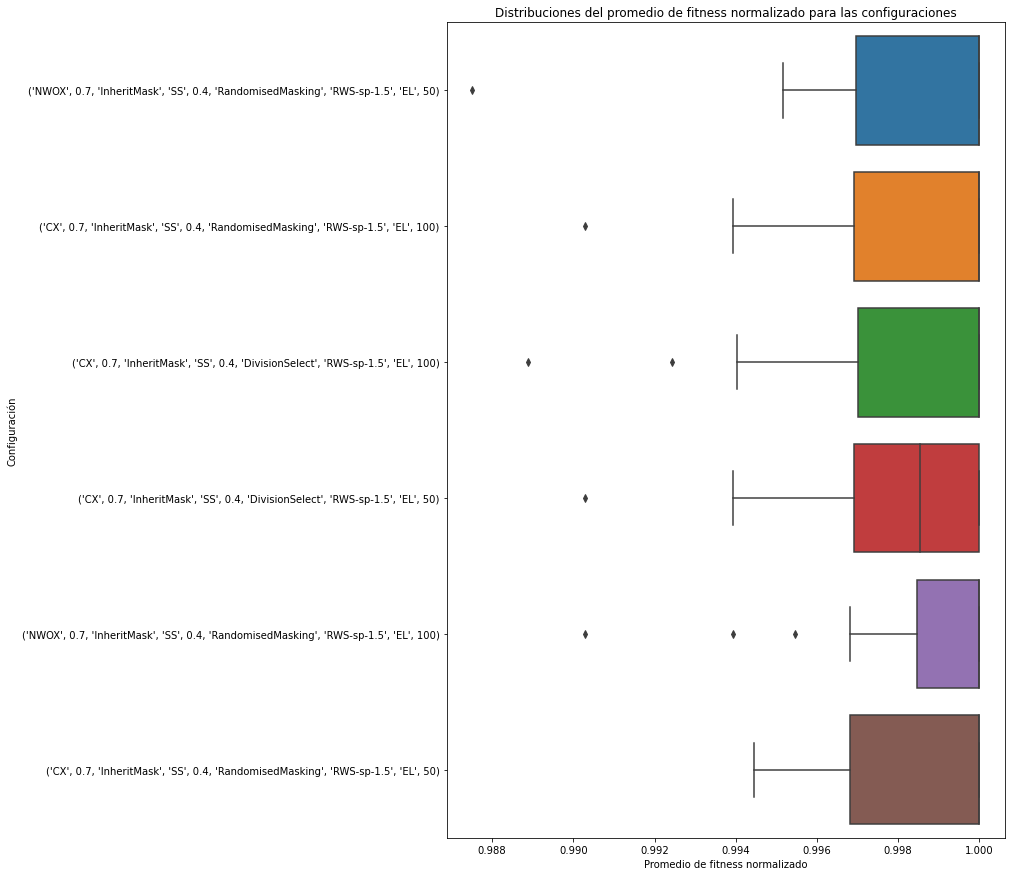

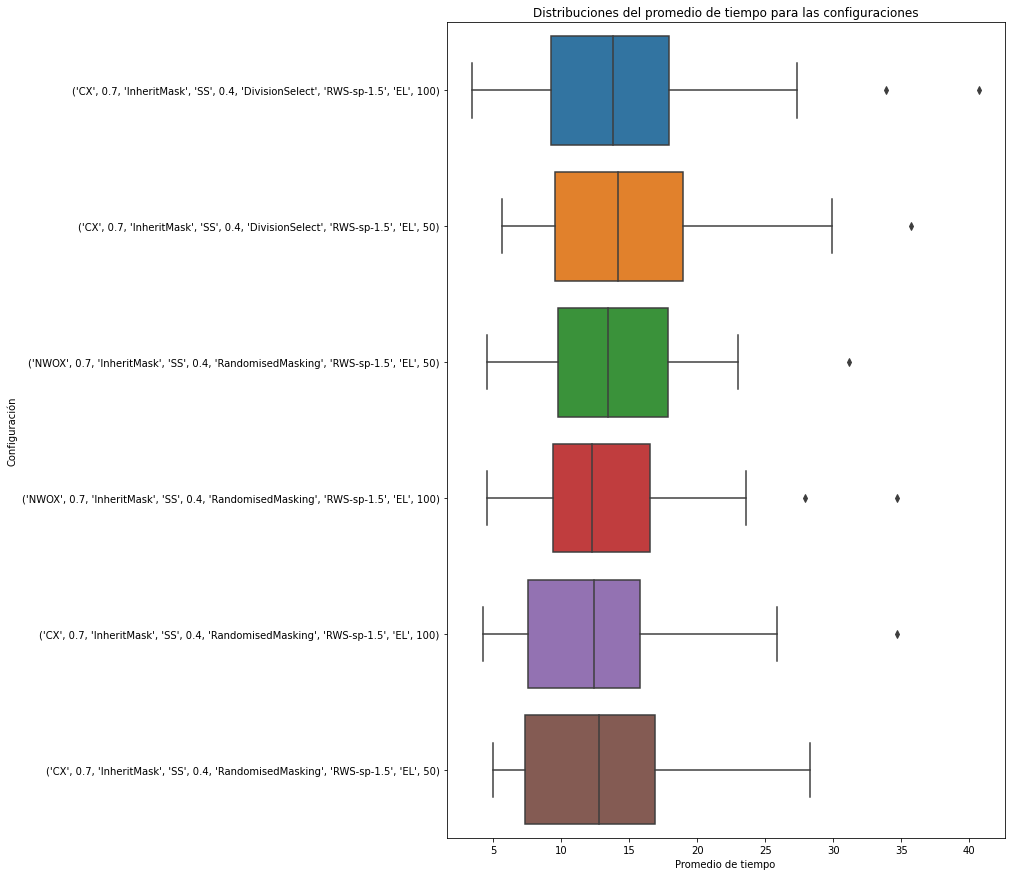

In [25]:
# plot_sorted_distribution(fdata,"normalized_fitness",normal=False)
# plot_sorted_distribution(fdata,"final_time",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(selected["configuration"])],"normalized_fitness",normal=False)
plot_sorted_distribution(fdata[fdata["configuration"].isin(faa2["configuration"])],"normalized_fitness",normal=False)
plot_sorted_distribution(fdata[fdata["configuration"].isin(faa2["configuration"])],"final_time",normal=False)

In [36]:
def plot_iteration_convergence2(data,configurations):
    subset = data[data["configuration"].isin(configurations)]
    sns.lineplot(x="iterations",y="normalized_fitness",data=subset,hue="configuration")
    plt.xlabel("Iteraciones")
    plt.ylabel("Promedio fitness normalizado")
    plt.title("Gráfico de convergencia")
    plt.legend(prop={"size":6.5})
    # plt.legend(title="Configuración",bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

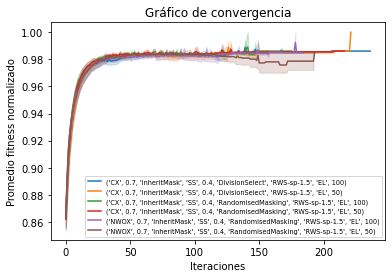

In [37]:
plot_iteration_convergence2(idata,
list(fdata2["configuration"]))

In [ ]:
pd.unique(selected["configuration"])

array(["('NWOX', 0.7, 'InheritMask', 'SS', 0.4, 'RandomisedMasking', 'RWS-sp-1.5', 'EL', 50)",
       "('CX', 0.7, 'InheritMask', 'SS', 0.4, 'RandomisedMasking', 'RWS-sp-1.5', 'EL', 100)",
       "('CX', 0.7, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('CX', 0.7, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.7, 'InheritMask', 'SS', 0.4, 'RandomisedMasking', 'RWS-sp-1.5', 'EL', 100)",
       "('CX', 0.7, 'InheritMask', 'SS', 0.4, 'RandomisedMasking', 'RWS-sp-1.5', 'EL', 50)"],
      dtype=object)

Mejor configuración:
('CX', 0.7, 'InheritMask', 'SS', 0.4, 'RandomisedMasking', 'RWS-sp-1.5', 'EL')-50"  
El gráfico de convergencia muestra comportamientos muy similares, los dos que tienen cruce nwox son los mejores en cuanto al fitness pero solo el nwox con población de 100 es el que logra mejor tiempo, ya que el otro parece que tiene unos valores anómalos con cierto número grande de iteraciones. En general las configuraciones que resultan son todas las mismas excepto el hecho de que cambia el tamaño de la población y la mutación de las máscaras, en todos los casos se está de acuerdo que las probabilidades de cruce, mutación y método de mutación de permutaciones son 0.7, 0.4 y SS respectivamente. La configuración roja tiene una de las mejores convergencias y también puede ser escogida (de hecho yo la escogería, ya hay 4 de CX y 2 de NWOX)

### Belbin 40 3-5

In [ ]:
index = datalist_names.index("belbin-40-3to5")
fdata, idata = datalist_final[index],datalist_it[index]
pairs_best_in_nodiffs,selected,pairs_best_in_nodiffs2,full_filtro = analysis(fdata)

Fitness
Número de distribuciones no normales: 33 de 64
SpherResults(spher=False, W=inf, chi2=inf, dof=2015, pval=0.0)
Resultado Friedman fitness: p-value = 1.2201798230362721e-196
Wilcoxon post hoc
-----------------
Time
Número de distribuciones no normales: 3 de 8
SpherResults(spher=True, W=0.20203134166344594, chi2=27.912158957698512, dof=27, pval=0.42879512327706937)
Resultado Friedman fitness: p-value = 7.843088756513998e-09


In [ ]:
# selected
# pairs_best_in_nodiffs2

# plot_sorted_distribution(fdata,"normalized_fitness",normal=False)
# plot_sorted_distribution(fdata,"final_time",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(selected["configuration"])],"normalized_fitness",normal=False)

# plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"normalized_fitness",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"final_time",normal=False)
pd.unique(full_filtro["configuration"])

array(["('CX', 0.7, 'InheritMask', 'SS', 0.4, 'RandomisedMasking', 'RWS-sp-1.5', 'EL', 50)",
       "('CX', 0.9, 'InheritMask', 'SS', 0.4, 'RandomisedMasking', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'RandomisedMasking', 'RWS-sp-1.5', 'EL', 100)"],
      dtype=object)

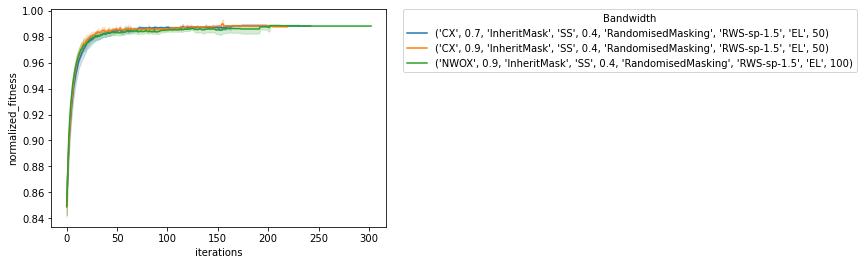

In [ ]:
plot_iteration_convergence(idata,
list(pd.unique(full_filtro["configuration"])))

Mejor configuración:   
"('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'RandomisedMasking', 'RWS-sp-1.5', 'EL')-100"  
Siempre se coincide en cuanto al tiempo en que SS y RandomisedMasking es mejor, y hay bastante variedad de probabilidades de mutación, métodos de cruce y poblaciones. En cuanto a la convergencia parece ser que la línea morada sube mucho más rápido al comienzo, aunque también presenta casos con mayor número de iteraciones, mientras que la roja va más por el medio pero suele acabar antes. Finalmente se escoge la configuración dada ya que prácticamente la mediana de fitness está igual al mejor, y es el que presenta mejor tiempo y convergencia

Belbin 20 4-4

In [ ]:
index = datalist_names.index("belbin-20-4to4")
fdata, idata = datalist_final[index],datalist_it[index]
pairs_best_in_nodiffs,selected,pairs_best_in_nodiffs2,full_filtro = analysis(fdata)

Fitness
Número de distribuciones no normales: 18 de 32
SpherResults(spher=True, W=inf, chi2=-inf, dof=495, pval=1.0)
Resultado Friedman fitness: p-value = 4.84389468964747e-20
Nemenyi-Friedman Post hoc
-----------------
Time
Número de distribuciones no normales: 31 de 32
SpherResults(spher=True, W=9.241956106399974e-16, chi2=328.495042942603, dof=495, pval=1.0000000374676805)
Resultado Friedman fitness: p-value = 6.857315528679524e-36


In [ ]:
# selected
pairs_best_in_nodiffs2.iloc[-1]

configuration         ('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'Divis...
best_fitness                                                   4.244048
final_time                                                     0.280989
optimal_solution                                               4.244048
normalized_fitness                                                  1.0
iterations                                                     2.114286
Name: 31, dtype: object

In [ ]:
# selected
# pairs_best_in_nodiffs2

# plot_sorted_distribution(fdata,"normalized_fitness",normal=False)
# plot_sorted_distribution(fdata,"final_time",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(selected["configuration"])],"normalized_fitness",normal=False)

# plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"normalized_fitness",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"final_time",normal=False)
pd.unique(full_filtro["configuration"])

array(["('NWOX', 0.7, 'InheritMask', 'RSM', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.7, 'InheritMask', 'RSM', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.9, 'InheritMask', 'RSM', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.9, 'InheritMask', 'RSM', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'RSM', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)"],
      dtype=object)

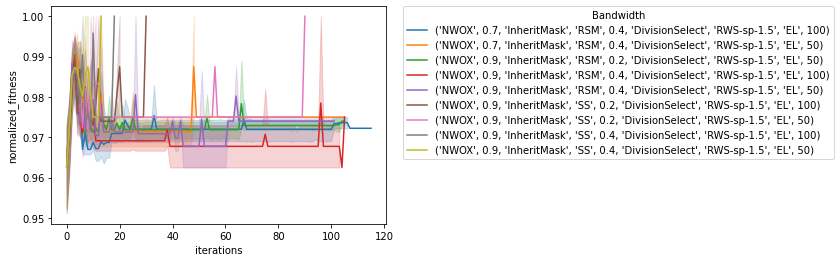

In [ ]:
plot_iteration_convergence(idata,
list(pd.unique(full_filtro["configuration"])))

Mejor configuración:
NWOX-X-SS-0.4-DS-RWS-EL
Básicamente las configuraciones que quedan en pie son todas iguales a excepción de un caso el método de cruce, la probabilidad de cruce y el tamaño de la población, las cuales se comparten entre todas ellas. Escogiendo los más mayoritarios, podríamos decir que el mejor cruce es el NWOX, y da igual la probabilidad de cruce a escoger así como el tamaño de la población. Las medianas de fitness son prácticamente iguales entre todos ellos, así que podríamos escoger 0.9 y 50 para pcross y pop ya que son las que presentan menor mediana de promedio de tiempo.
De los gráficos de convergencia no se ve nada claro.
('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)

Belbin 20 5-5

El test de Friedman dice que hay ciertas diferencias significativas, no obstante al hacer el test post hoc de nemenyi friedman se escogen todas las configuraciones (lo que da a entender que no hay diferencias)

In [ ]:
index = datalist_names.index("belbin-20-5to5")
fdata, idata = datalist_final[index],datalist_it[index]
pairs_best_in_nodiffs,selected,pairs_best_in_nodiffs2,full_filtro = analysis(fdata)

Fitness
Número de distribuciones no normales: 8 de 32
SpherResults(spher=True, W=inf, chi2=-inf, dof=495, pval=1.0)
Resultado Friedman fitness: p-value = 0.009428410174251518
Nemenyi-Friedman Post hoc
-----------------
Time
Número de distribuciones no normales: 32 de 32
SpherResults(spher=True, W=1.6087792028143868e+28, chi2=-616.3062891757462, dof=495, pval=1.0)
Resultado Friedman fitness: p-value = 1.2486322534618275e-10


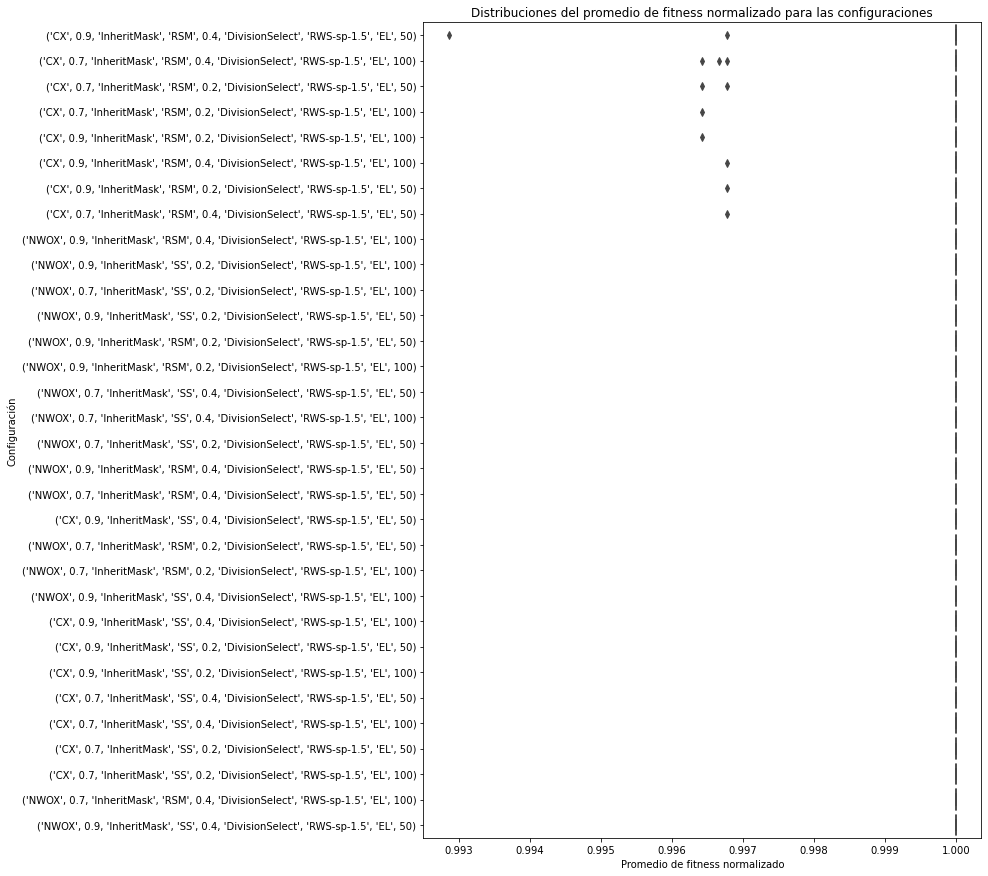

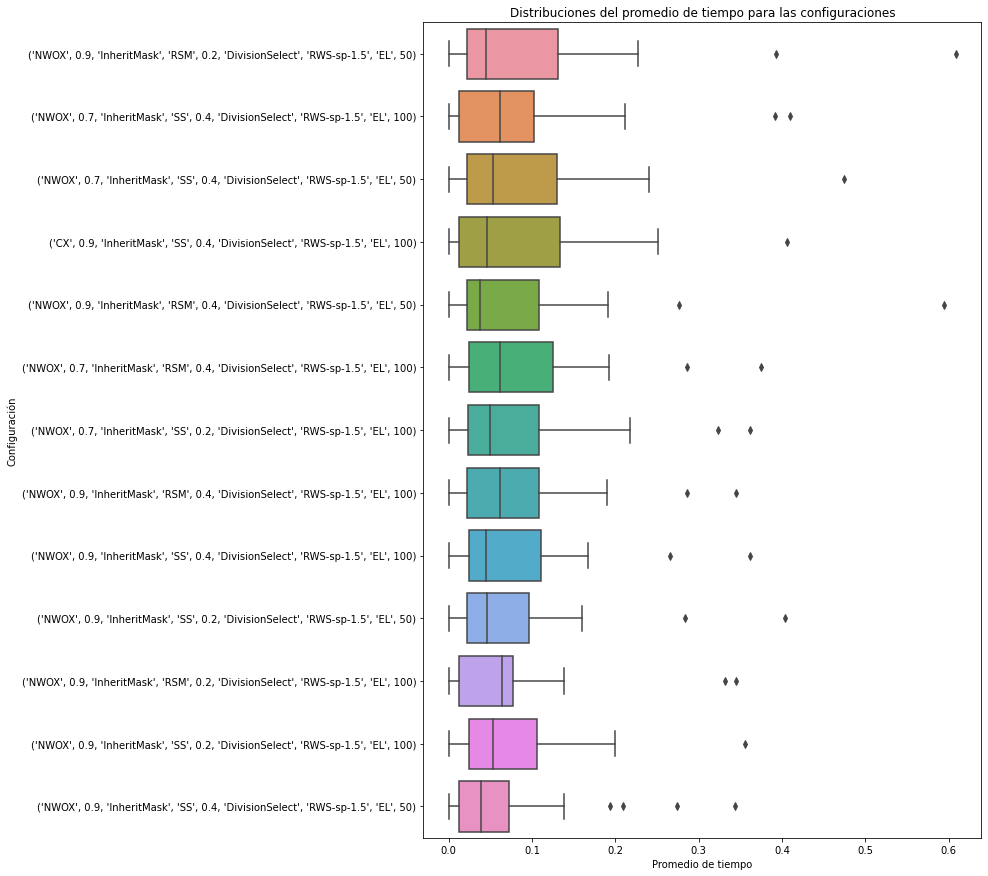

array(["('CX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.7, 'InheritMask', 'RSM', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.7, 'InheritMask', 'SS', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.7, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.7, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.9, 'InheritMask', 'RSM', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'RSM', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.9, 'InheritMask', 'RSM', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'RSM', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.2, 'DivisionSelect', 'RWS

In [ ]:
# selected
# pairs_best_in_nodiffs2

plot_sorted_distribution(fdata,"normalized_fitness",normal=False)
# plot_sorted_distribution(fdata,"final_time",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(selected["configuration"])],"normalized_fitness",normal=False)

# plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"normalized_fitness",normal=False)
plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"final_time",normal=False)
pd.unique(full_filtro["configuration"])

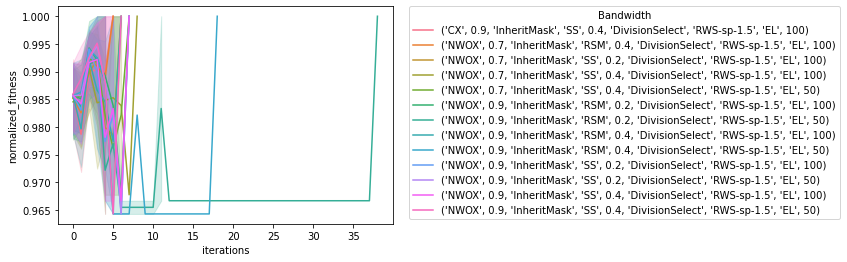

In [ ]:
plot_iteration_convergence(idata,
list(pd.unique(full_filtro["configuration"])))

Mejor configuración:  
('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)  
Caso similar al anterior, los fitness son prácticamente perfectos a excepción de un valor anómalo que corresponde con el que presenta mayor número de iteraciones (al parecer alguna/s repetición/es no han convergido bien) por lo que la decisión se basa en los tiempos, donde sí hay diferencias claras. El resto pasa un poco como en lo anterior, muchas coinciden en los métodos de mutación o de cruce de permutaciones, mientras que hay diversidad en las probabilidades de cruce y mutación y en las poblaciones. Se escoge finalmente la que tiene mejor mediana de tiempo promedio, ya que los gráficos de convergencia no indican gran cosa.

Belbin 30 3-3

In [ ]:
index = datalist_names.index("belbin-30-3to3")
fdata, idata = datalist_final[index],datalist_it[index]
pairs_best_in_nodiffs,selected,pairs_best_in_nodiffs2,full_filtro = analysis(fdata)

Fitness
Número de distribuciones no normales: 20 de 32
SpherResults(spher=True, W=inf, chi2=-inf, dof=495, pval=1.0)
Resultado Friedman fitness: p-value = 5.828888551657683e-94
Wilcoxon post hoc
-----------------
Time
Número de distribuciones no normales: 6 de 8
SpherResults(spher=False, W=0.06002756079308035, chi2=49.09270075406021, dof=27, pval=0.0067193695869092835)
Resultado Friedman fitness: p-value = 1.841863822965821e-07


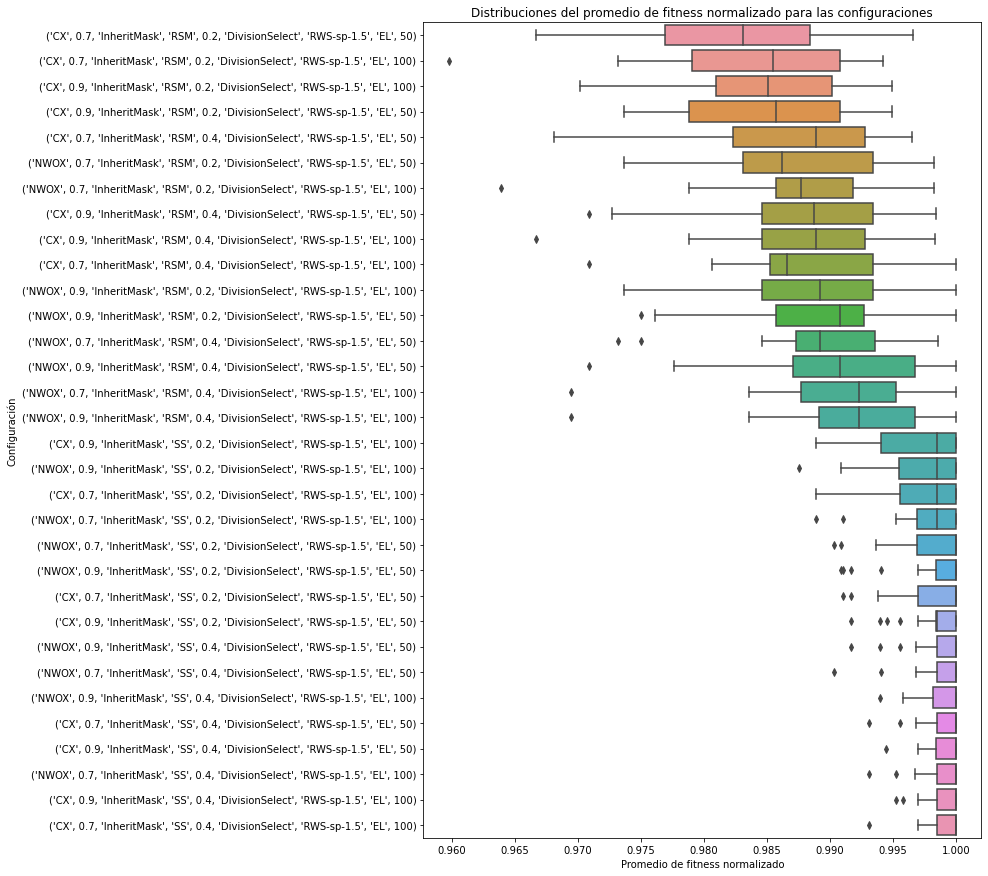

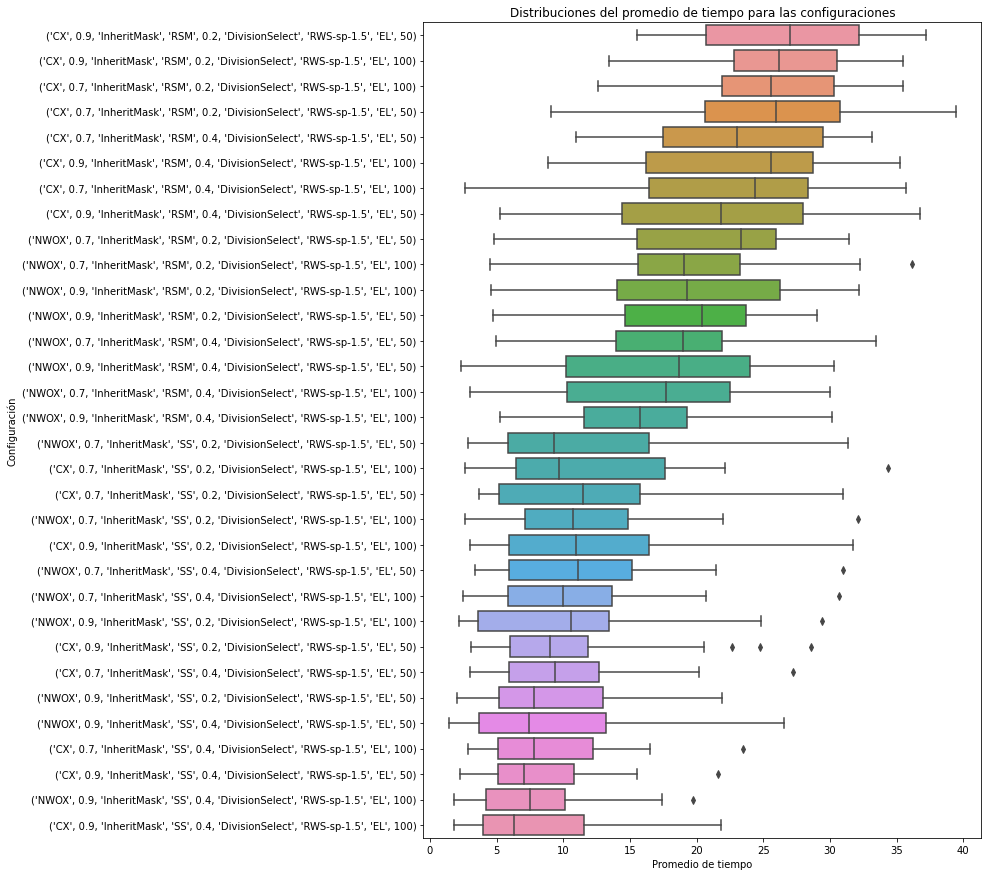

array(["('CX', 0.7, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('CX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('CX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)"],
      dtype=object)

In [ ]:
# selected
# pairs_best_in_nodiffs2

plot_sorted_distribution(fdata,"normalized_fitness",normal=False)
plot_sorted_distribution(fdata,"final_time",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(selected["configuration"])],"normalized_fitness",normal=False)

# plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"normalized_fitness",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"final_time",normal=False)
pd.unique(full_filtro["configuration"])

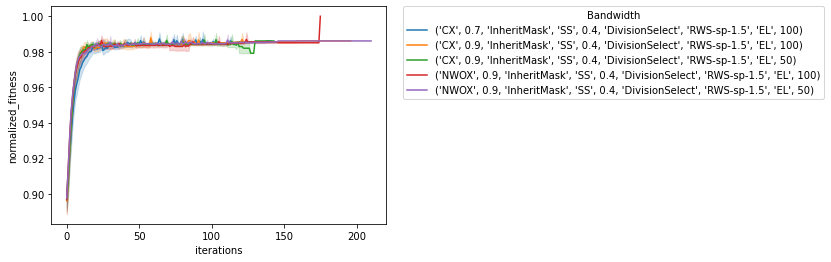

In [ ]:
plot_iteration_convergence(idata,
list(pd.unique(full_filtro["configuration"])))

Mejor configuración:
('CX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)
Al menos aquí inicialmente hay un poco más de variedad en los fitness promedio, al verse los boxplots de todas las configuraciones, y los test muestran que hay diferencias entre ellas tanto en el fitness como luego al filtrarlas y mirar por el tiempo de ejecución. En el gráfico de convergencia parece que la línea verde se alza un poco más que el resto al comienzo, aunque también presenta algún caso con más iteraciones. La roja tampoco lo hace mal en ese sentido. Las medianas de fitness son iguales para las configuraciones escogidas finalmente, por lo que nos decantamos por la señalada al mostrar el segundo mejor tiempo y una convergencia un poco mejor.
La mayoría coinciden en 0.9, 0.4 y SS.

Belbin 30 5-5

In [ ]:
index = datalist_names.index("belbin-30-5to5")
fdata, idata = datalist_final[index],datalist_it[index]
pairs_best_in_nodiffs,selected,pairs_best_in_nodiffs2,full_filtro = analysis(fdata)

Fitness
Número de distribuciones no normales: 18 de 32
SpherResults(spher=True, W=inf, chi2=-inf, dof=495, pval=1.0)
Resultado Friedman fitness: p-value = 3.744557593061695e-28
Nemenyi-Friedman Post hoc
-----------------
Time
Número de distribuciones no normales: 32 de 32
SpherResults(spher=True, W=2.6261845706580055e-26, chi2=558.9326120047903, dof=495, pval=0.6303459061261034)
Resultado Friedman fitness: p-value = 4.694219188694487e-53


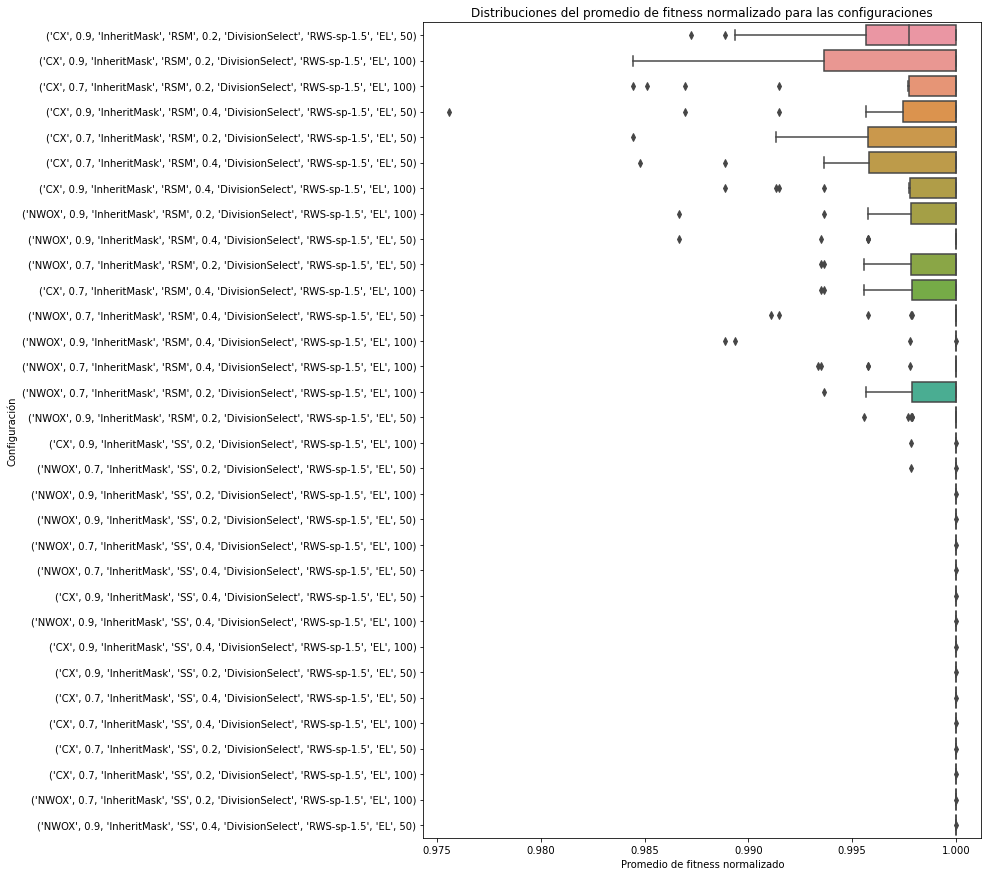

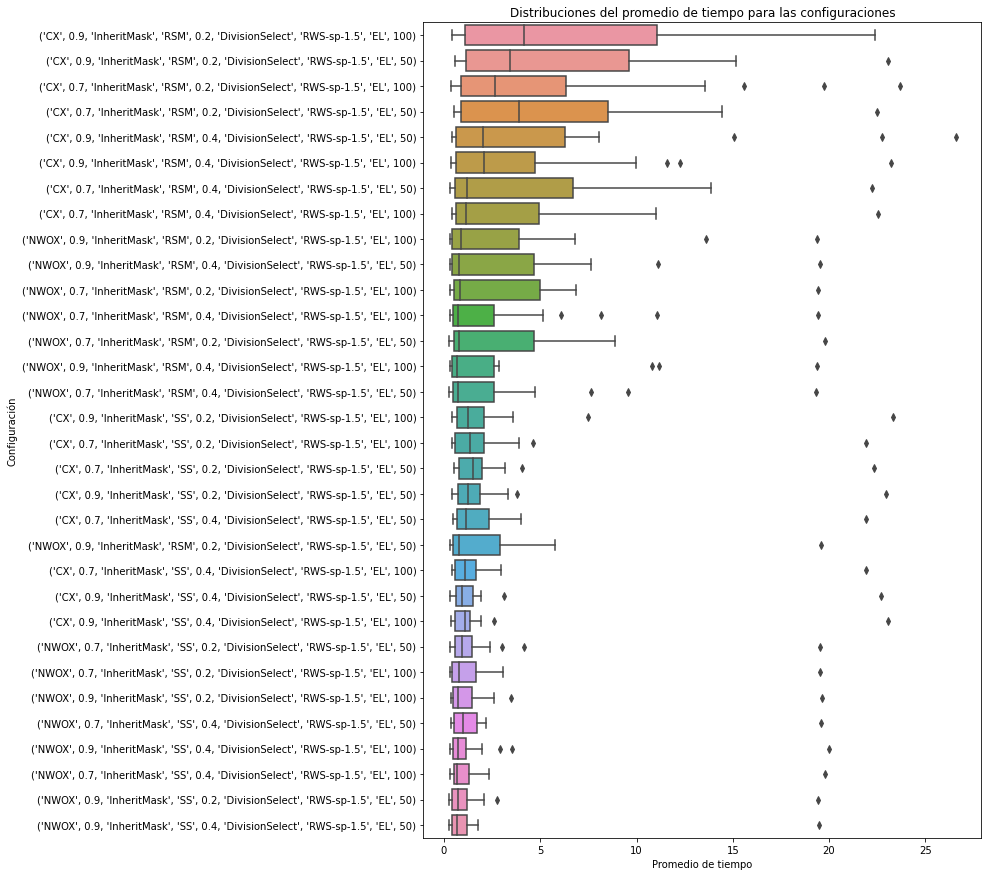

array(["('NWOX', 0.9, 'InheritMask', 'RSM', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)"],
      dtype=object)

In [ ]:
# selected
# pairs_best_in_nodiffs2

plot_sorted_distribution(fdata,"normalized_fitness",normal=False)
plot_sorted_distribution(fdata,"final_time",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(selected["configuration"])],"normalized_fitness",normal=False)

# plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"normalized_fitness",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"final_time",normal=False)
pd.unique(full_filtro["configuration"])

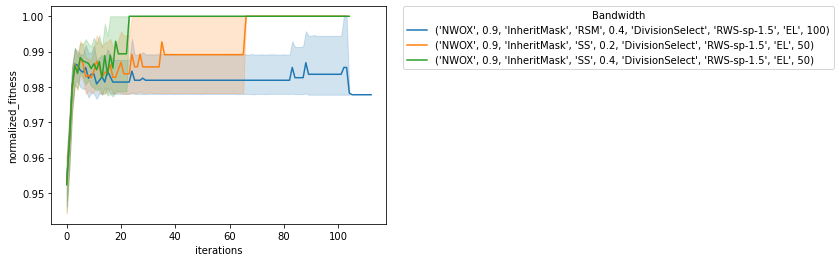

In [ ]:
plot_iteration_convergence(idata,
list(pd.unique(full_filtro["configuration"])))

Algo interesante de los gráficos es que en el caso de los tiempos, todos tienen un valor anómalo muy alto, posiblemente se deba a que una instancia es más complicada de resolver (?)
Mejor configuración:
('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)
En general los fitness son muy altos, el test de friedman dice que hay diferencias pero luego al hacer nemenyi no sale nada. En cualquier caso luego se observan diferencias en los tiempos, con 3 configuraciones distintas que no difieren entre sí (una de ellas es la que mejor mediana de tiempo tiene). Todas coinciden en el operador de cruce y la probabilidad de este, 2 coinciden en operador de mutación y tamaño de población (SS,50) mientras que 2 coinciden en probabilidad de mutación (0.4, dos confs son idénticas a excepción de este). La línea verde en el gráfico de convergencia parece estar un poco encima del resto, y en realidad en los gráficos de distribuciones la configuración asociada parece tener una caja más pequeña, por lo que se escoge esta. Los boxplots de todas ellas para el fitness son iguales (mejor solución) a excepción de unos valores un poco más alejados.

Belbin 40 4-4

In [ ]:
index = datalist_names.index("belbin-40-4to4")
fdata, idata = datalist_final[index],datalist_it[index]
pairs_best_in_nodiffs,selected,pairs_best_in_nodiffs2,full_filtro = analysis(fdata)

Fitness
Número de distribuciones no normales: 28 de 32
SpherResults(spher=True, W=inf, chi2=-inf, dof=495, pval=1.0)
Resultado Friedman fitness: p-value = 1.0243314255041599e-76
Nemenyi-Friedman Post hoc
-----------------
Time
Número de distribuciones no normales: 11 de 18
SpherResults(spher=False, W=6.36635039799426e-15, chi2=462.4355224191179, dof=152, pval=1.243355905936665e-31)
Resultado Friedman fitness: p-value = 1.6303297492152745e-27


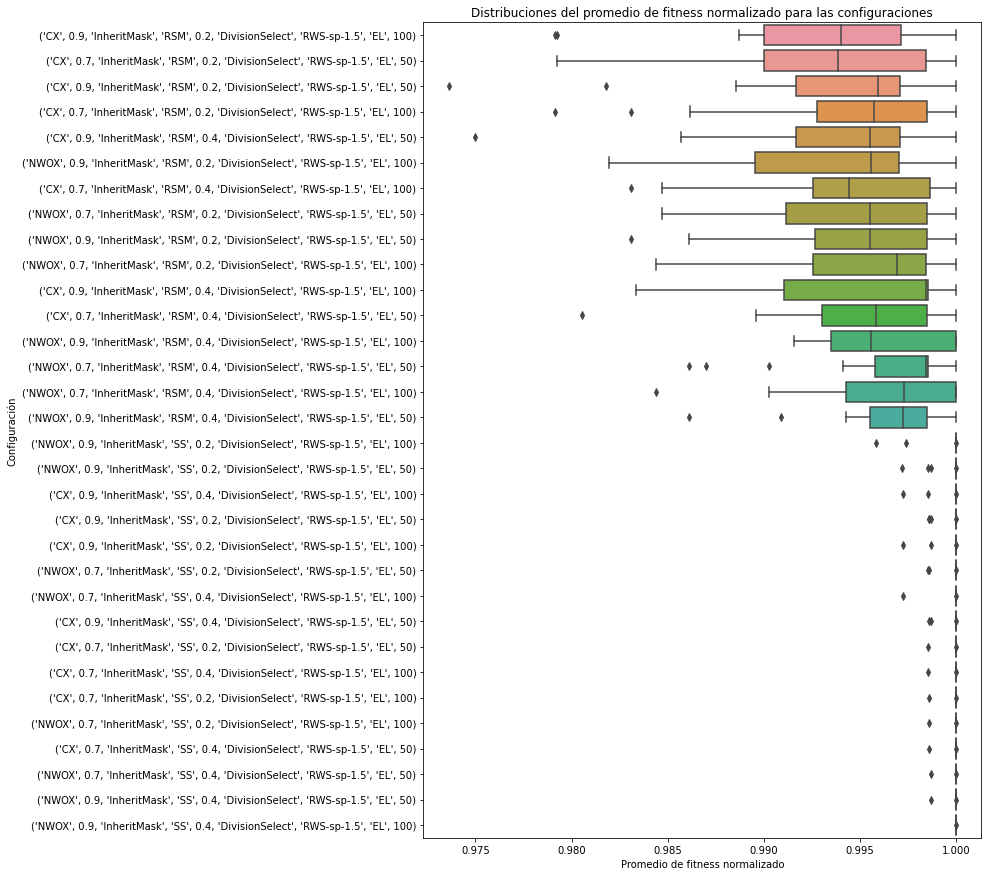

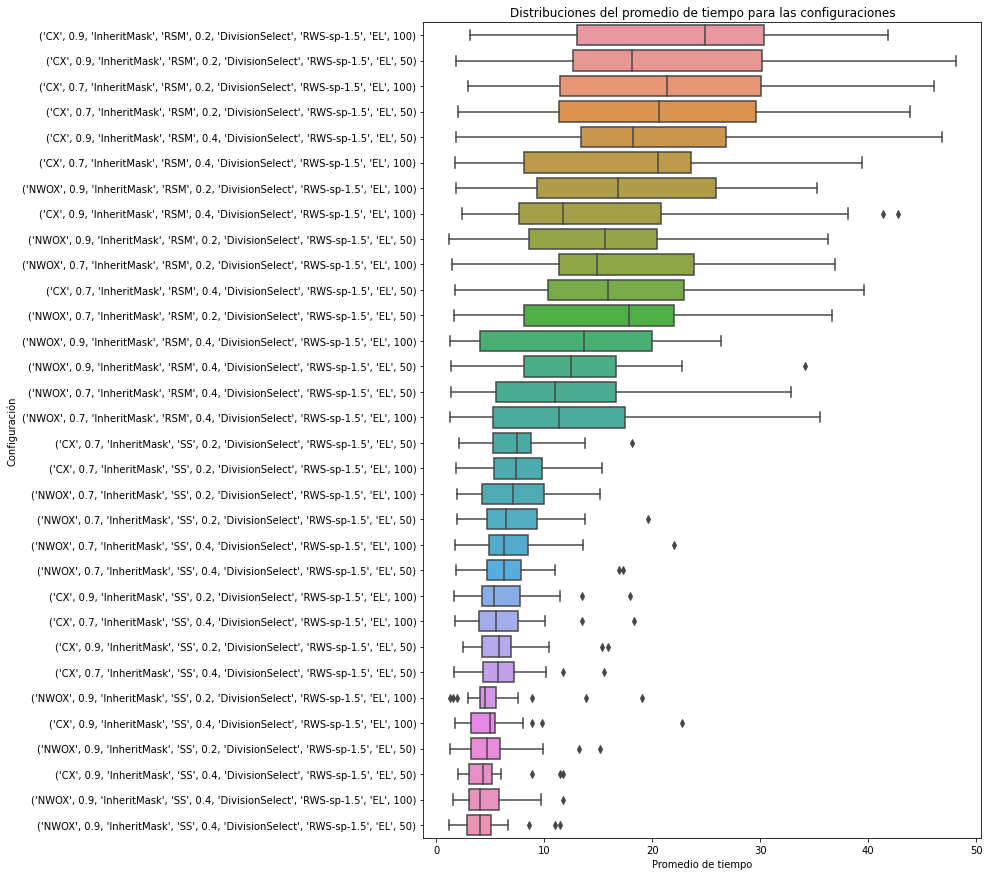

array(["('CX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('CX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)"],
      dtype=object)

In [ ]:
# selected
# pairs_best_in_nodiffs2

plot_sorted_distribution(fdata,"normalized_fitness",normal=False)
plot_sorted_distribution(fdata,"final_time",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(selected["configuration"])],"normalized_fitness",normal=False)

# plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"normalized_fitness",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"final_time",normal=False)
pd.unique(full_filtro["configuration"])

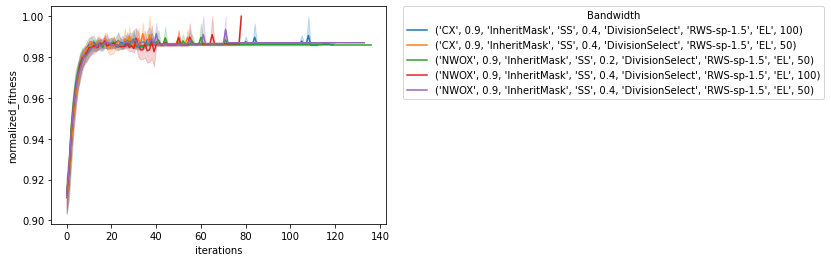

In [ ]:
plot_iteration_convergence(idata,
list(pd.unique(full_filtro["configuration"])))

Hay diferencias en cuanto a los fitness, descártandose múltiples configuraciones. También se encuentran diferencias en cuanto al tiempo, descártandose aquellas que tienen promedios de tiempos promedio menores. Realmente las configuraciones escogidas finalmente alcanzan el óptimo en la mayoría de casos, y no parece haber una gran diferencia en el gráfico de convergencia. Por tanto podemos escoger la configuración con menor tiempo registrado de mediana, esto es:
('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)

Belbin 40 5-5

In [ ]:
index = datalist_names.index("belbin-40-5to5")
fdata, idata = datalist_final[index],datalist_it[index]
pairs_best_in_nodiffs,selected,pairs_best_in_nodiffs2,full_filtro = analysis(fdata)

Fitness
Número de distribuciones no normales: 20 de 32
SpherResults(spher=True, W=inf, chi2=-inf, dof=495, pval=1.0)
Resultado Friedman fitness: p-value = 7.933514913503721e-56
Nemenyi-Friedman Post hoc
-----------------
Time
Número de distribuciones no normales: 14 de 24
SpherResults(spher=False, W=3.858109792494415e-22, chi2=599.1835287484149, dof=275, pval=2.0016989658416076e-24)
Resultado Friedman fitness: p-value = 1.2446840967018355e-26


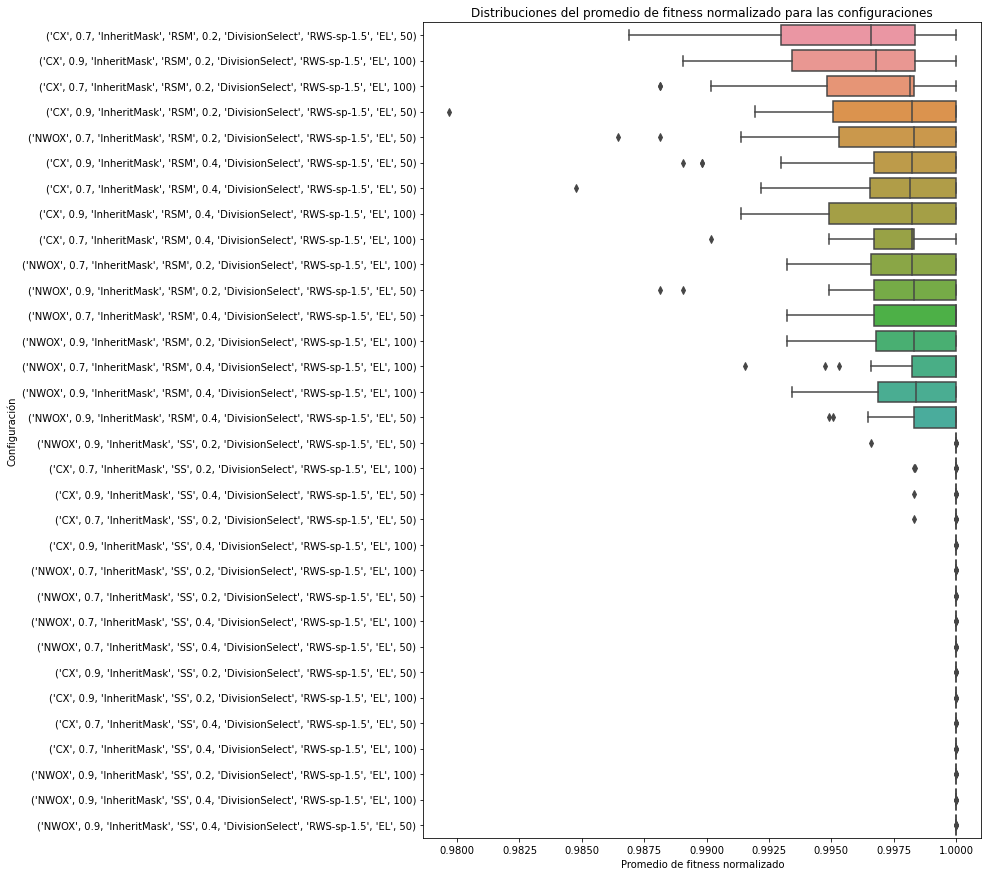

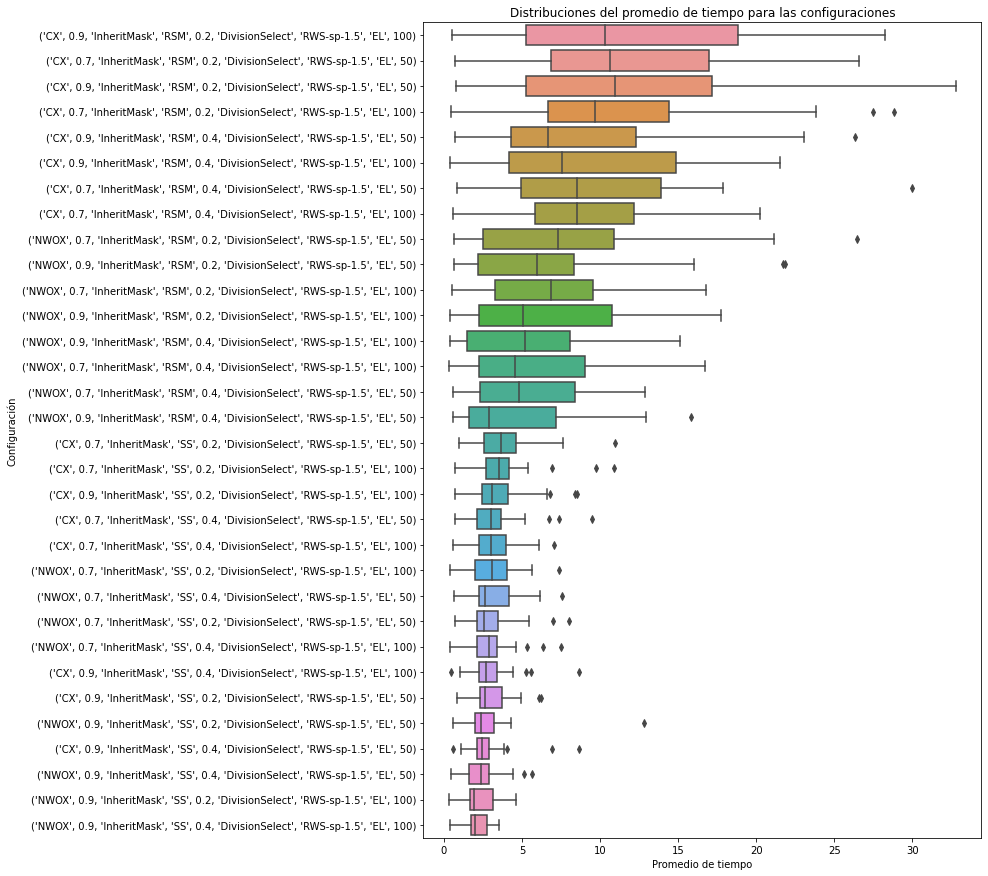

array(["('NWOX', 0.9, 'InheritMask', 'SS', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)"],
      dtype=object)

In [ ]:
# selected
# pairs_best_in_nodiffs2

plot_sorted_distribution(fdata,"normalized_fitness",normal=False)
plot_sorted_distribution(fdata,"final_time",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(selected["configuration"])],"normalized_fitness",normal=False)

# plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"normalized_fitness",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"final_time",normal=False)
pd.unique(full_filtro["configuration"])

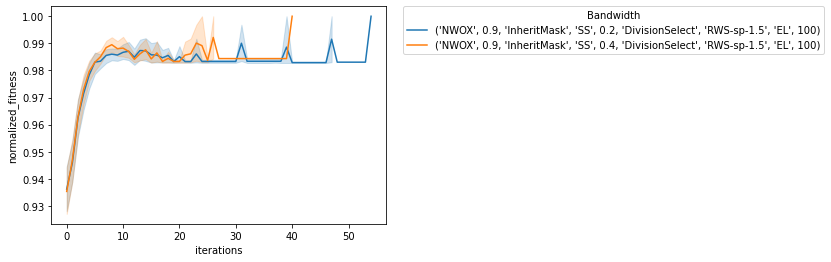

In [ ]:
plot_iteration_convergence(idata,
list(pd.unique(full_filtro["configuration"])))

Básicamente configuración muy parecida a las anteriores, mismas a excepción del tamaño de la población y la probabilidad de mutación. Mejor:
('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL',100) (mejor convergencia)
o tamb
('NWOX', 0.9, 'InheritMask', 'SS', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL',100) 

## MBTI

MBTI 20 3-5

Raro porque el test de Friedman dice que hay diferencias pero en el de Nemenyi no se descarta nada

In [ ]:
index = datalist_names.index("mbti-20-3to5")
fdata, idata = datalist_final[index],datalist_it[index]
pairs_best_in_nodiffs,selected,pairs_best_in_nodiffs2,full_filtro = analysis(fdata)

Fitness
Número de distribuciones no normales: 47 de 64
SpherResults(spher=False, W=inf, chi2=inf, dof=2015, pval=0.0)
Resultado Friedman fitness: p-value = 4.3021806118986673e-13
Nemenyi-Friedman Post hoc
-----------------
Time
Número de distribuciones no normales: 64 de 64
SpherResults(spher=True, W=1659511146448.2559, chi2=32.97601077746516, dof=2015, pval=1.0)
Resultado Friedman fitness: p-value = 1.3166146869060118e-42


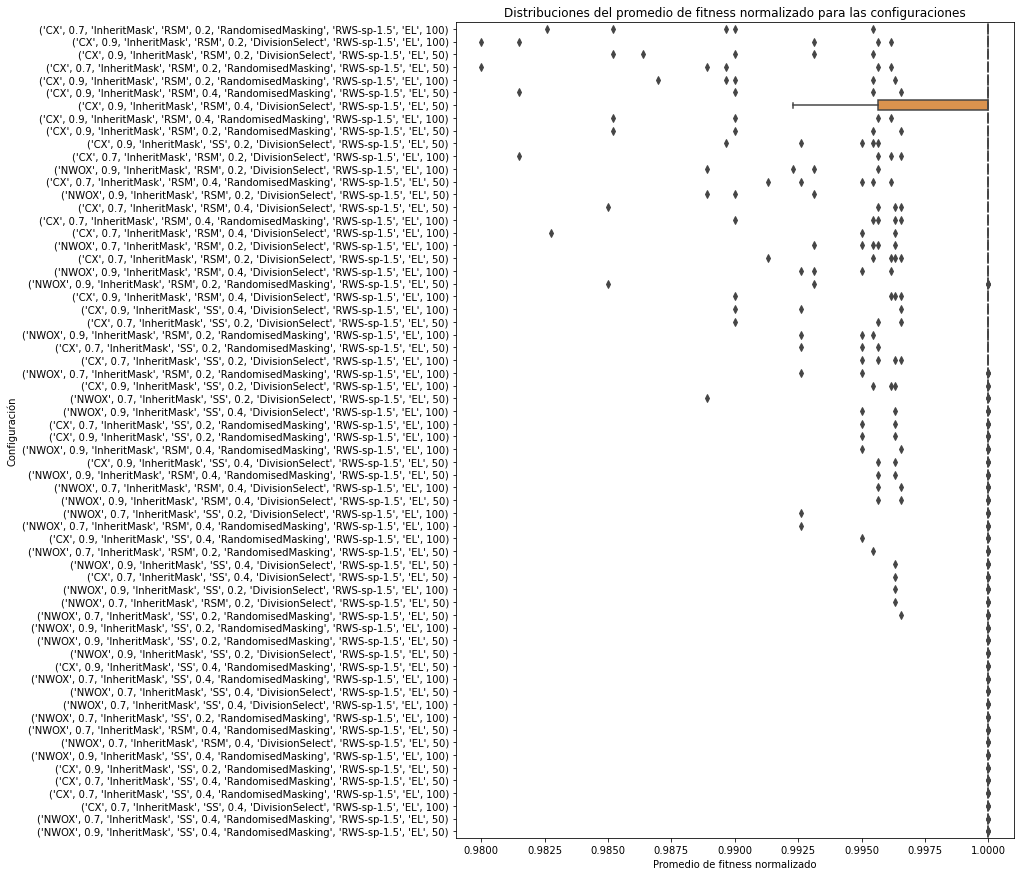

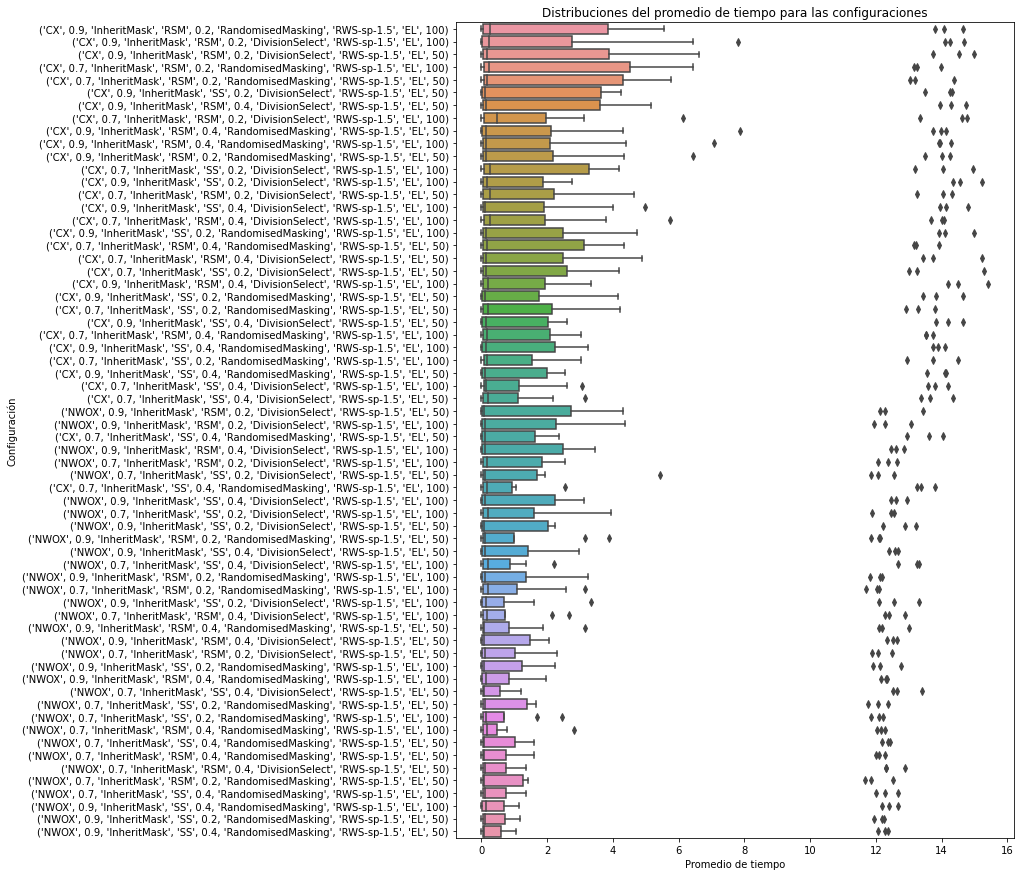

array(["('NWOX', 0.7, 'InheritMask', 'RSM', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.7, 'InheritMask', 'RSM', 0.2, 'RandomisedMasking', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.7, 'InheritMask', 'RSM', 0.2, 'RandomisedMasking', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.7, 'InheritMask', 'RSM', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.7, 'InheritMask', 'RSM', 0.4, 'RandomisedMasking', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.7, 'InheritMask', 'RSM', 0.4, 'RandomisedMasking', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.7, 'InheritMask', 'SS', 0.2, 'RandomisedMasking', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.7, 'InheritMask', 'SS', 0.2, 'RandomisedMasking', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.7, 'InheritMask', 'SS', 0.4, 'RandomisedMasking', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'RSM', 0.2, 'RandomisedMasking', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'RSM', 

In [ ]:
# selected
# pairs_best_in_nodiffs2

plot_sorted_distribution(fdata,"normalized_fitness",normal=False)
plot_sorted_distribution(fdata,"final_time",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(selected["configuration"])],"normalized_fitness",normal=False)

# plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"normalized_fitness",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"final_time",normal=False)
pd.unique(full_filtro["configuration"])

In [ ]:
print(len(pd.unique(full_filtro["configuration"])))

20


De las 20 mejores configuraciones:
9 0.7, 11 0.9
16 RSM, 17 SS
...
Básicamente cualquiera vale , que presentan mayores tiempos promedio
('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'RandomisedMasking', 'RWS-sp-1.5', 'EL',50)

MBTI 30 3-5

In [ ]:
index = datalist_names.index("mbti-30-3to5")
fdata, idata = datalist_final[index],datalist_it[index]
pairs_best_in_nodiffs,selected,pairs_best_in_nodiffs2,full_filtro = analysis(fdata)

Fitness
Número de distribuciones no normales: 64 de 64
SpherResults(spher=False, W=inf, chi2=inf, dof=2015, pval=0.0)
Resultado Friedman fitness: p-value = 3.227940989666425e-50
Wilcoxon post hoc
-----------------
Time
Número de distribuciones no normales: 26 de 26
SpherResults(spher=False, W=1.4294561397624792e-20, chi2=524.8764310418363, dof=324, pval=3.874403015816559e-10)
Resultado Friedman fitness: p-value = 7.007559683310303e-17


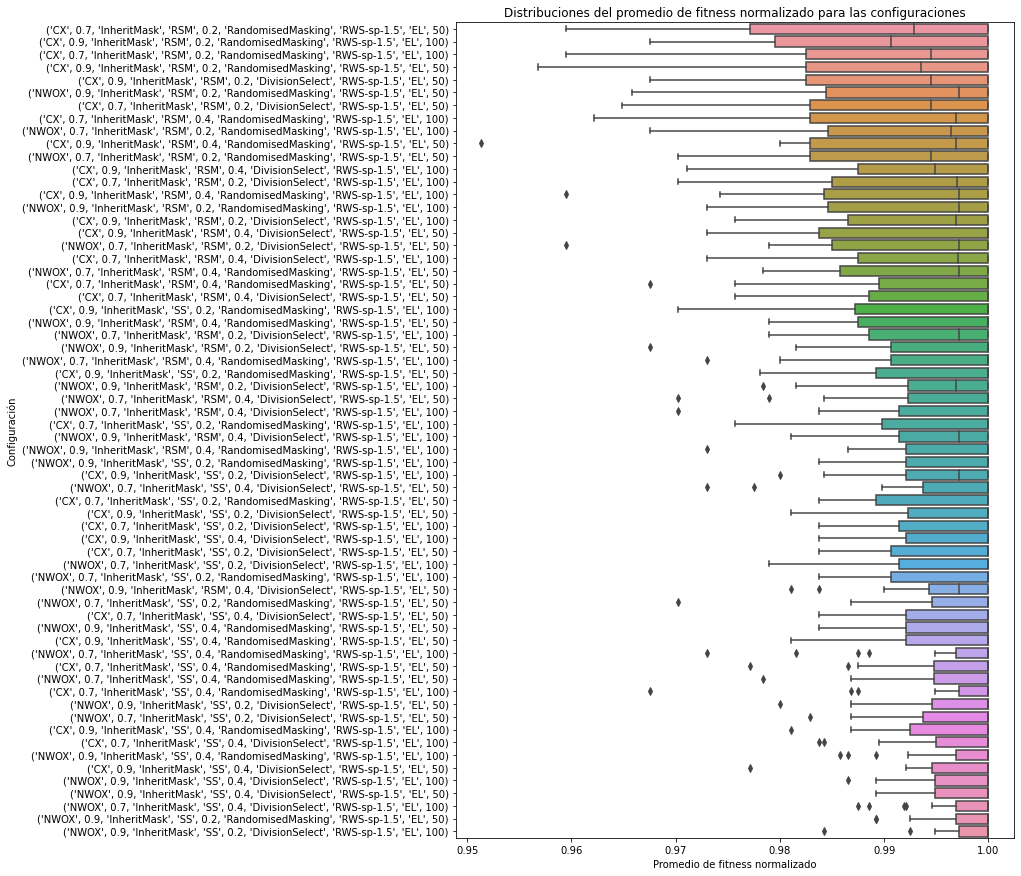

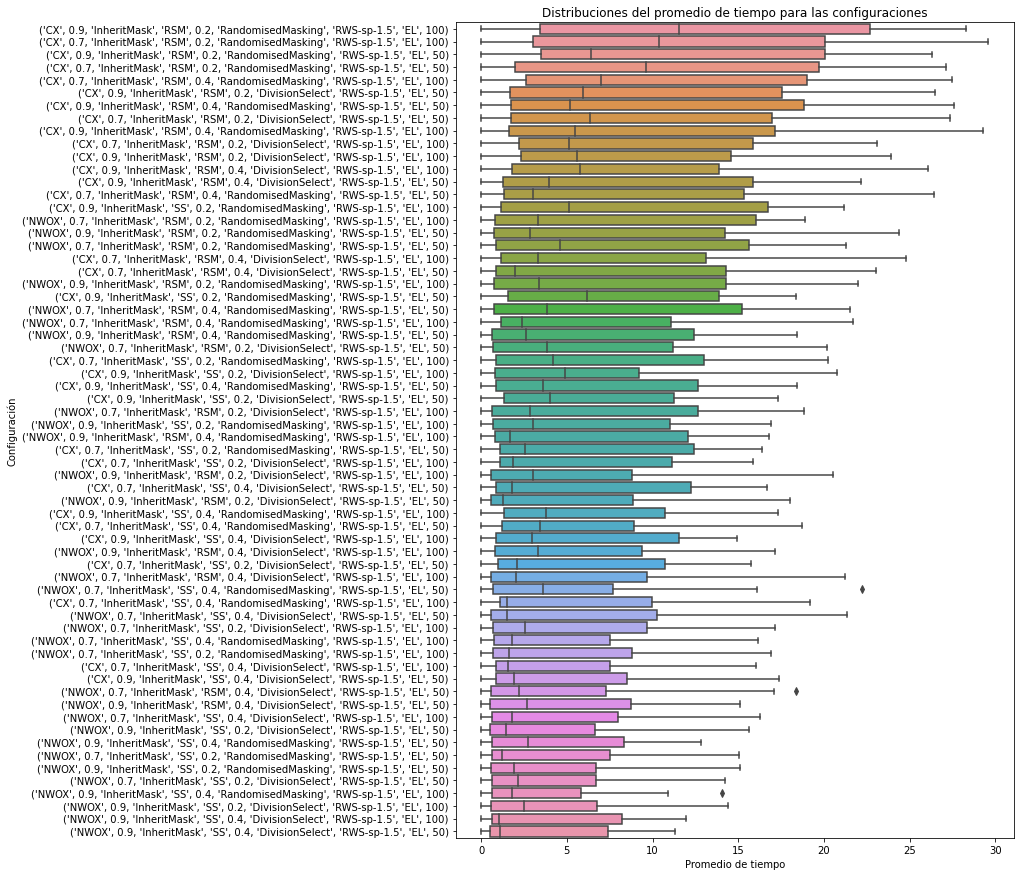

array(["('CX', 0.7, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('CX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.7, 'InheritMask', 'SS', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.7, 'InheritMask', 'SS', 0.2, 'RandomisedMasking', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.7, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'RSM', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.2, 'RandomisedMasking', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp

In [ ]:
# selected
# pairs_best_in_nodiffs2

plot_sorted_distribution(fdata,"normalized_fitness",normal=False)
plot_sorted_distribution(fdata,"final_time",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(selected["configuration"])],"normalized_fitness",normal=False)

# plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"normalized_fitness",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"final_time",normal=False)
pd.unique(full_filtro["configuration"])

Mejor configuración. 
('NWOX', 0.9, 'InheritMask', 'SS', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL',100)

MBTI 40 3-5

In [ ]:
index = datalist_names.index("mbti-40-3to5")
fdata, idata = datalist_final[index],datalist_it[index]
pairs_best_in_nodiffs,selected,pairs_best_in_nodiffs2,full_filtro = analysis(fdata)

Fitness
Número de distribuciones no normales: 63 de 64
SpherResults(spher=False, W=inf, chi2=inf, dof=2015, pval=0.0)
Resultado Friedman fitness: p-value = 5.980045091190964e-73
Wilcoxon post hoc
-----------------
Time
Número de distribuciones no normales: 9 de 11
SpherResults(spher=False, W=0.001373734425989255, chi2=108.51899534166948, dof=54, pval=3.0261922126689426e-05)
Resultado Friedman fitness: p-value = 6.086505754610146e-12


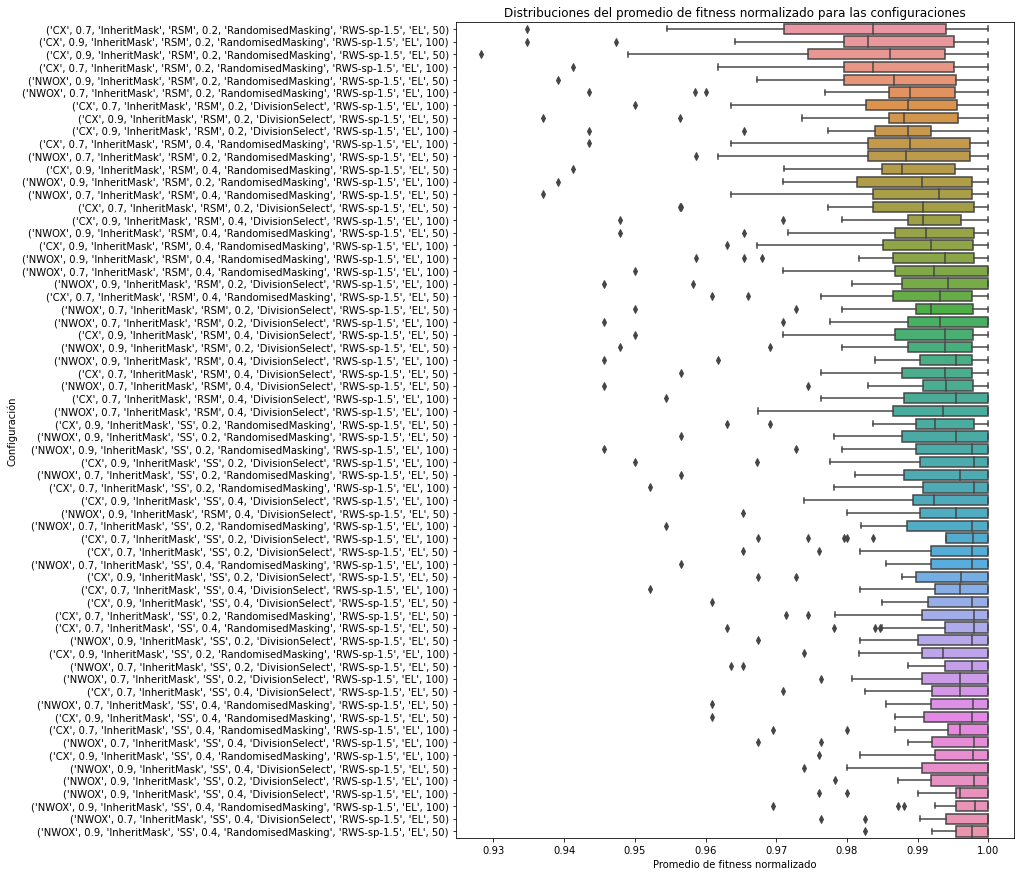

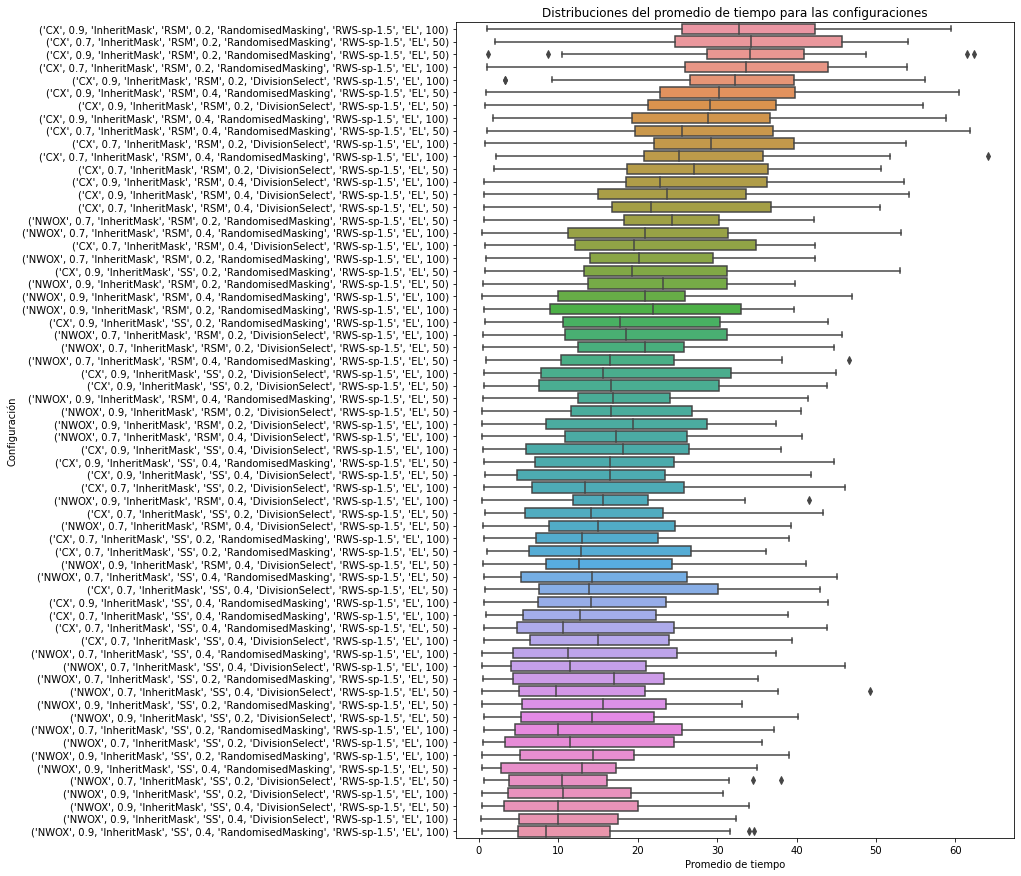

array(["('NWOX', 0.7, 'InheritMask', 'SS', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'RandomisedMasking', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'RandomisedMasking', 'RWS-sp-1.5', 'EL', 50)"],
      dtype=object)

In [ ]:
# selected
# pairs_best_in_nodiffs2

plot_sorted_distribution(fdata,"normalized_fitness",normal=False)
plot_sorted_distribution(fdata,"final_time",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(selected["configuration"])],"normalized_fitness",normal=False)

# plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"normalized_fitness",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"final_time",normal=False)
pd.unique(full_filtro["configuration"])

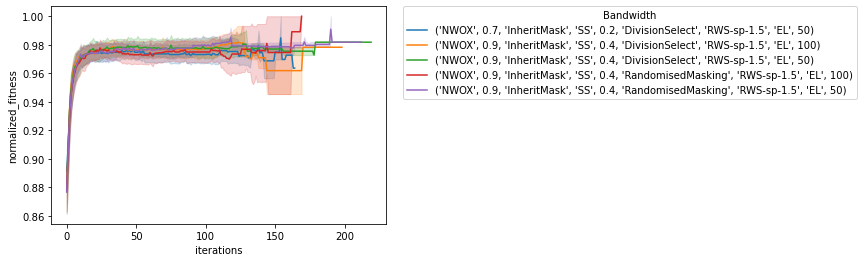

In [ ]:
plot_iteration_convergence(idata,
list(pd.unique(full_filtro["configuration"])))

Mejor configuración:
('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'RandomisedMasking', 'RWS-sp-1.5', 'EL',50)
En general las configuraciones son todas muy similares, solo cambia el tamaño de la población o el método de mutación de la máscara

MBTI 20 4-4

In [ ]:
index = datalist_names.index("mbti-20-4to4")
fdata, idata = datalist_final[index],datalist_it[index]
pairs_best_in_nodiffs,selected,pairs_best_in_nodiffs2,full_filtro = analysis(fdata)

Fitness
Número de distribuciones no normales: 7 de 32
SpherResults(spher=True, W=inf, chi2=-inf, dof=495, pval=1.0)
Resultado Friedman fitness: p-value = 0.14881314323127862
Nemenyi-Friedman Post hoc
-----------------
Time
Número de distribuciones no normales: 32 de 32
SpherResults(spher=True, W=8.917377652932191e+29, chi2=-654.4066740357596, dof=495, pval=1.0)
Resultado Friedman fitness: p-value = 7.363062653648218e-06


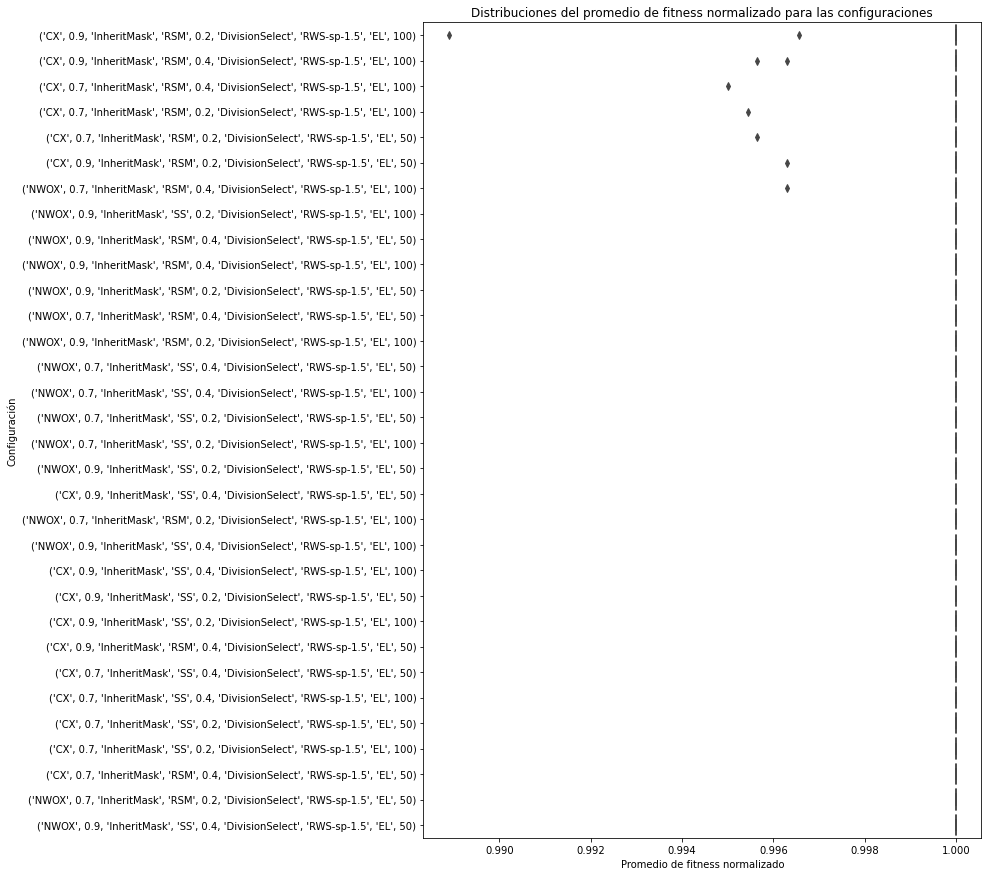

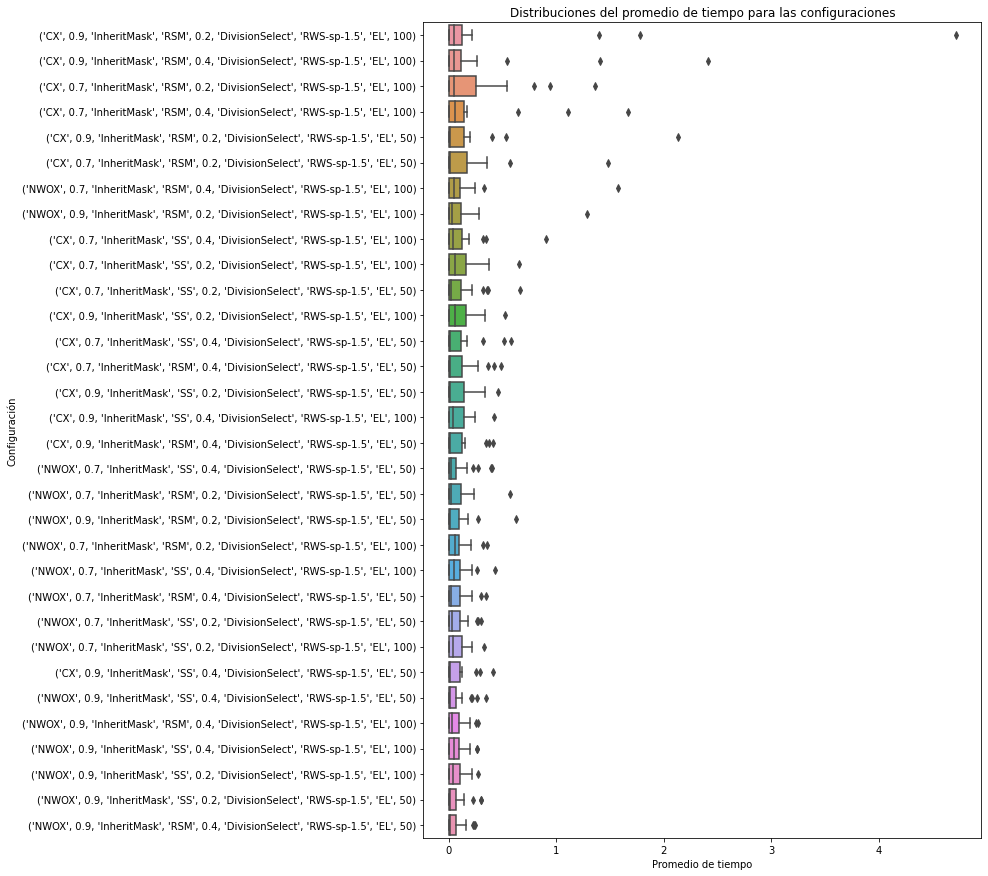

array(["('CX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.7, 'InheritMask', 'RSM', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.7, 'InheritMask', 'SS', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.7, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'RSM', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'RSM', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.9, 'InheritMask', 'RSM', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'RSM', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-

In [ ]:
# selected
# pairs_best_in_nodiffs2

plot_sorted_distribution(fdata,"normalized_fitness",normal=False)
plot_sorted_distribution(fdata,"final_time",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(selected["configuration"])],"normalized_fitness",normal=False)

# plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"normalized_fitness",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"final_time",normal=False)
pd.unique(full_filtro["configuration"])

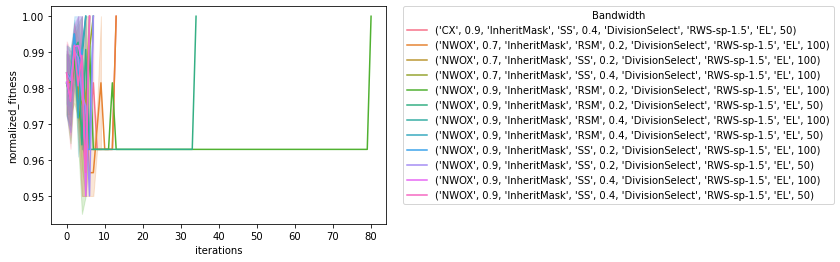

In [ ]:
plot_iteration_convergence(idata,
list(pd.unique(full_filtro["configuration"])))

No se observan diferencias en el fitness porque prácticamente todas alcanzan el óptimo a excepción de algún valor ligeramente por debajo. Los tiempos además son muy parecidos, y las configuraciones coinciden en muchas cosas:
('NWOX', 0.9, 'InheritMask', 'RSM', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL',50)

MBTI 20 5-5

In [ ]:
index = datalist_names.index("mbti-20-5to5")
fdata, idata = datalist_final[index],datalist_it[index]
pairs_best_in_nodiffs,selected,pairs_best_in_nodiffs2,full_filtro = analysis(fdata)

Fitness
Número de distribuciones no normales: 0 de 32
SpherResults(spher=True, W=inf, chi2=-inf, dof=495, pval=1.0)
Resultado Friedman fitness: p-value = nan
Nemenyi-Friedman Post hoc
-----------------
Time
Número de distribuciones no normales: 32 de 32
SpherResults(spher=True, W=9.105494294727433e+86, chi2=-1900.0433383630618, dof=495, pval=1.0)
Resultado Friedman fitness: p-value = 0.8219844565175062


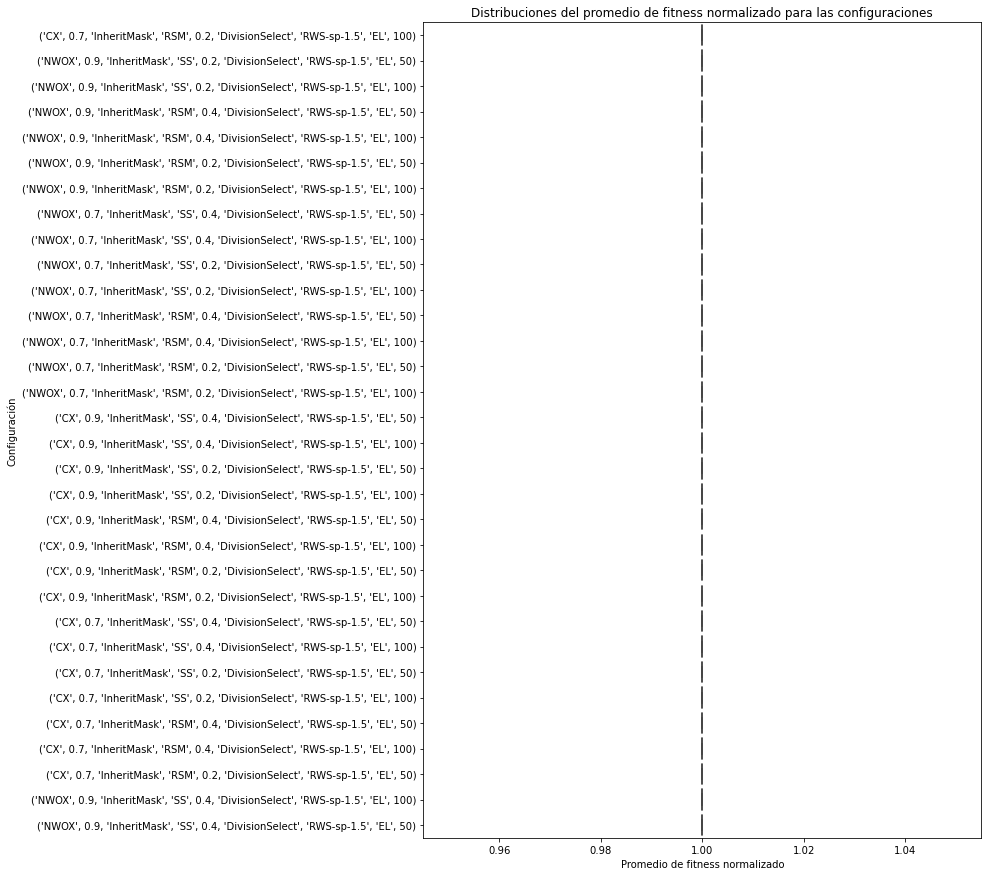

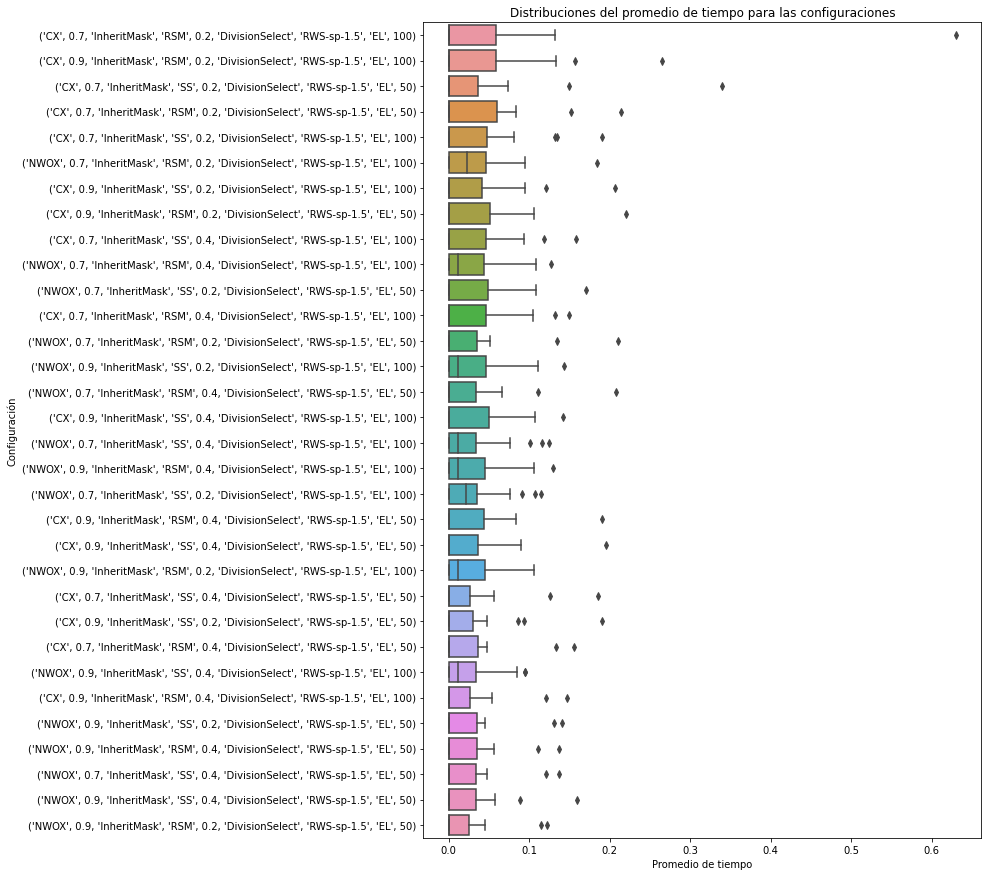

array(["('CX', 0.7, 'InheritMask', 'RSM', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('CX', 0.7, 'InheritMask', 'RSM', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('CX', 0.7, 'InheritMask', 'SS', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('CX', 0.7, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('CX', 0.7, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('CX', 0.9, 'InheritMask', 'RSM', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('CX', 0.9, 'InheritMask', 'RSM', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('CX', 0.9, 'InheritMask', 'RSM', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('CX', 0.9, 'InheritMask', 'RSM', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('CX', 0.9, 'InheritMask', 'SS', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('CX', 0.9, 'InheritMask', 'SS', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)

In [ ]:
# selected
# pairs_best_in_nodiffs2

plot_sorted_distribution(fdata,"normalized_fitness",normal=False)
plot_sorted_distribution(fdata,"final_time",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(selected["configuration"])],"normalized_fitness",normal=False)

# plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"normalized_fitness",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"final_time",normal=False)
pd.unique(full_filtro["configuration"])

In [ ]:
print(len(pd.unique(full_filtro["configuration"])))

27


Todas con fitness perfecto, viendo los tiempos la mayoría no presentan grandes diferencias. Podemos escoger la que menor tiempo haya presentado
('NWOX', 0.9, 'InheritMask', 'RSM', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)

MBTI 30 3-3

In [ ]:
index = datalist_names.index("mbti-30-3to3")
fdata, idata = datalist_final[index],datalist_it[index]
pairs_best_in_nodiffs,selected,pairs_best_in_nodiffs2,full_filtro = analysis(fdata)

Fitness
Número de distribuciones no normales: 20 de 32
SpherResults(spher=True, W=inf, chi2=-inf, dof=495, pval=1.0)
Resultado Friedman fitness: p-value = 9.779488389684449e-31
Nemenyi-Friedman Post hoc
-----------------
Time
Número de distribuciones no normales: 30 de 31
SpherResults(spher=False, W=5.027150151287903e-29, chi2=640.0171240904494, dof=464, pval=5.951279066855104e-06)
Resultado Friedman fitness: p-value = 2.296693823157422e-43


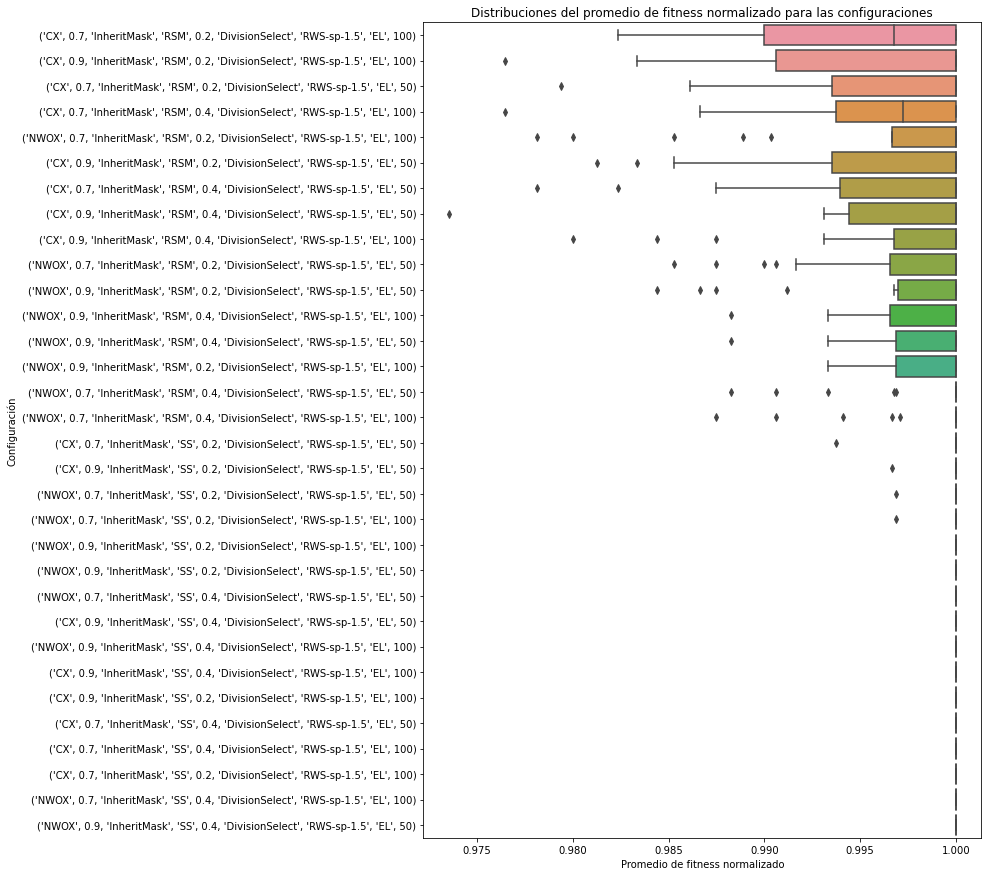

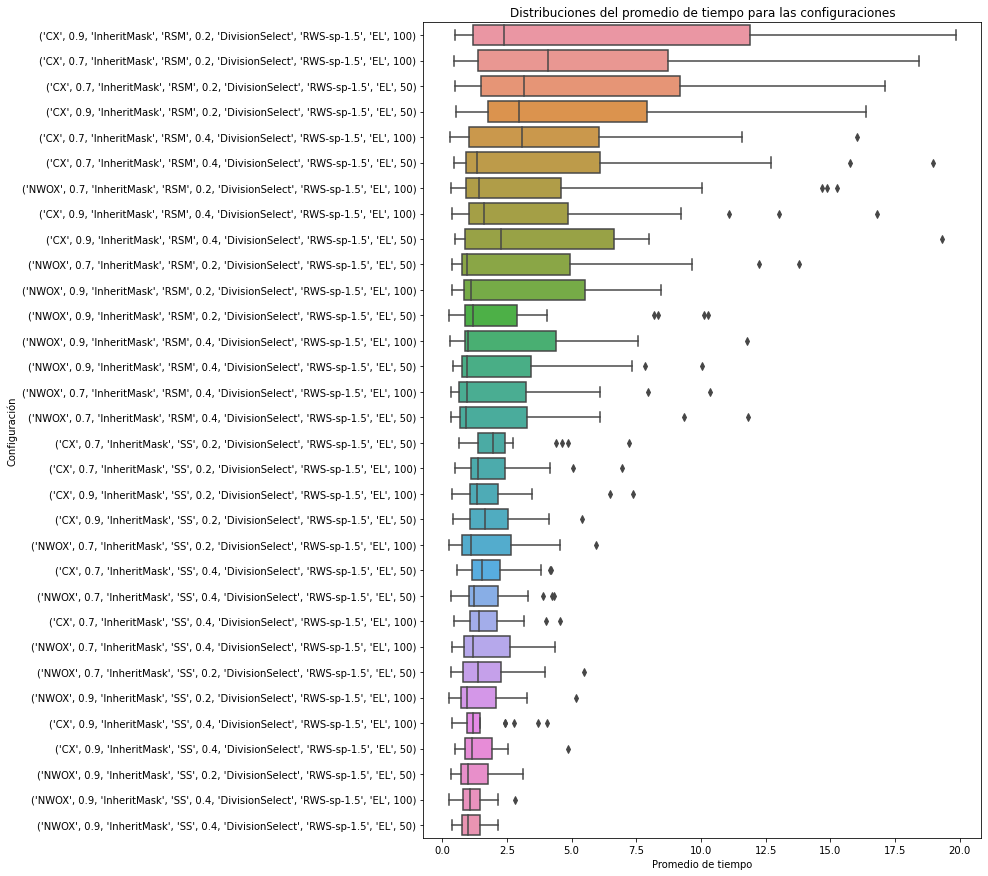

array(["('NWOX', 0.7, 'InheritMask', 'RSM', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)"],
      dtype=object)

In [ ]:
# selected
# pairs_best_in_nodiffs2

plot_sorted_distribution(fdata,"normalized_fitness",normal=False)
plot_sorted_distribution(fdata,"final_time",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(selected["configuration"])],"normalized_fitness",normal=False)

# plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"normalized_fitness",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"final_time",normal=False)
pd.unique(full_filtro["configuration"])

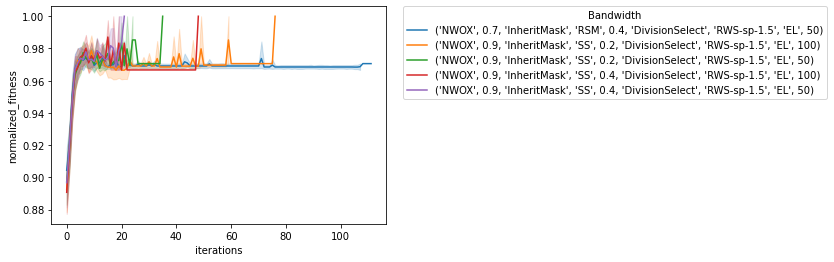

In [ ]:
plot_iteration_convergence(idata,
list(pd.unique(full_filtro["configuration"])))

Mejor configuración. ('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL',50)

MBTI 30 5-5

Raro porque no cambia

In [ ]:
index = datalist_names.index("mbti-30-5to5")
fdata, idata = datalist_final[index],datalist_it[index]
pairs_best_in_nodiffs,selected,pairs_best_in_nodiffs2,full_filtro = analysis(fdata)

Fitness
Número de distribuciones no normales: 15 de 32
SpherResults(spher=True, W=inf, chi2=-inf, dof=495, pval=1.0)
Resultado Friedman fitness: p-value = 4.262704859068338e-09
Nemenyi-Friedman Post hoc
-----------------
Time
Número de distribuciones no normales: 32 de 32
SpherResults(spher=True, W=3.0444998549088777e-17, chi2=360.88186318292065, dof=495, pval=1.0000460033119993)
Resultado Friedman fitness: p-value = 7.003509459063884e-39


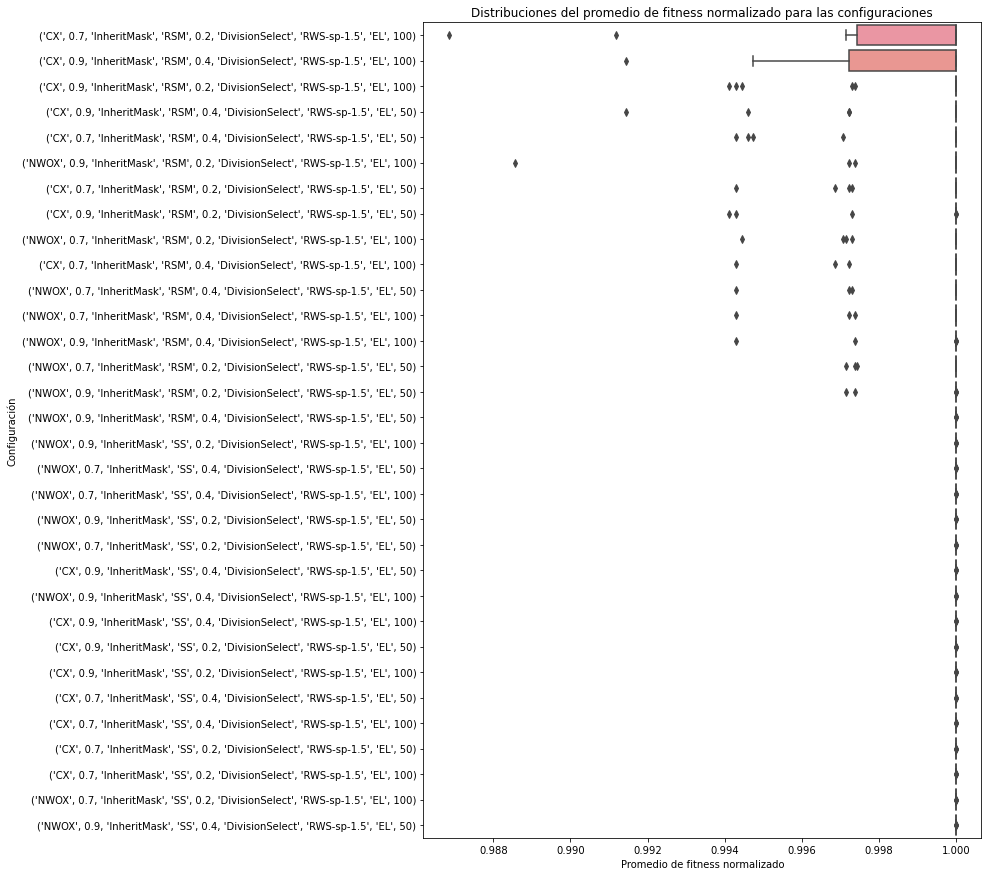

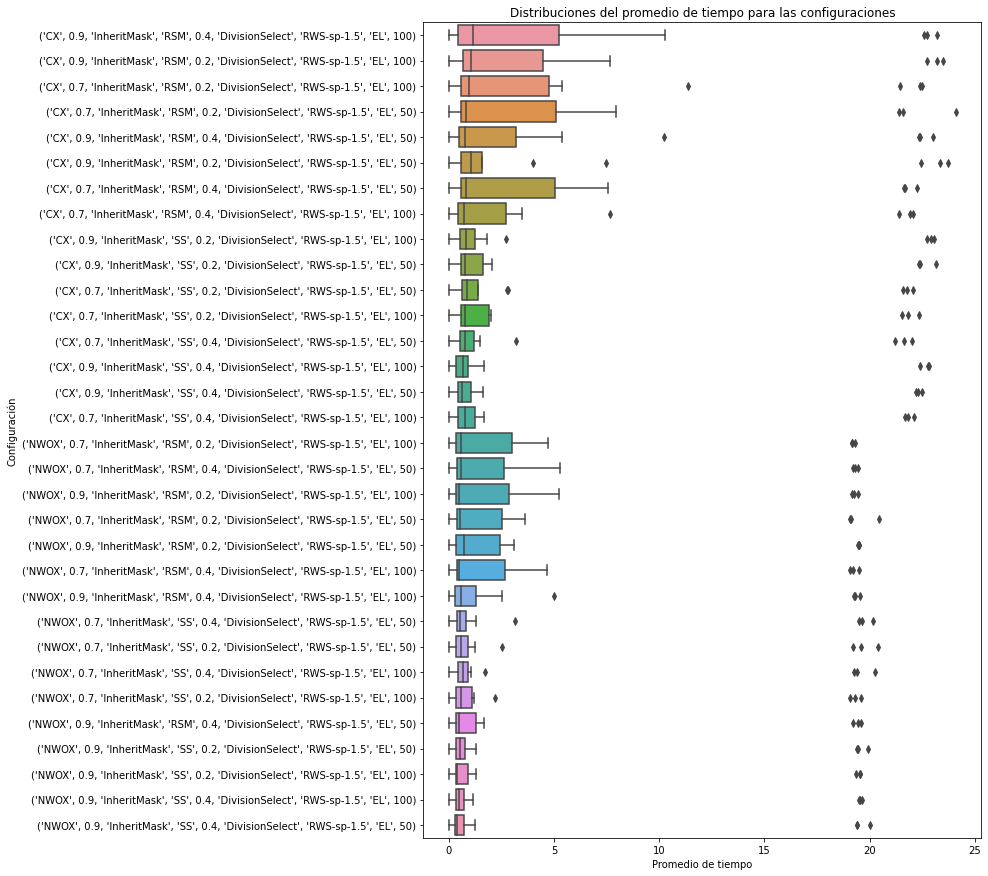

array(["('NWOX', 0.7, 'InheritMask', 'RSM', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.7, 'InheritMask', 'RSM', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.7, 'InheritMask', 'RSM', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.7, 'InheritMask', 'RSM', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.9, 'InheritMask', 'RSM', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'RSM', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'RSM', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', '

In [ ]:
# selected
# pairs_best_in_nodiffs2

plot_sorted_distribution(fdata,"normalized_fitness",normal=False)
plot_sorted_distribution(fdata,"final_time",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(selected["configuration"])],"normalized_fitness",normal=False)

# plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"normalized_fitness",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"final_time",normal=False)
pd.unique(full_filtro["configuration"])

Mejor. ('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL',50)

MBTI 40 4-4

Raro pq no cambia

In [ ]:
index = datalist_names.index("mbti-40-4to4")
fdata, idata = datalist_final[index],datalist_it[index]
pairs_best_in_nodiffs,selected,pairs_best_in_nodiffs2,full_filtro = analysis(fdata)

Fitness
Número de distribuciones no normales: 25 de 32
SpherResults(spher=True, W=inf, chi2=-inf, dof=495, pval=1.0)
Resultado Friedman fitness: p-value = 8.730137897869756e-25
Nemenyi-Friedman Post hoc
-----------------
Time
Número de distribuciones no normales: 32 de 32
SpherResults(spher=False, W=5.422392780071368e-30, chi2=639.4520566292101, dof=495, pval=0.0006366950468969077)
Resultado Friedman fitness: p-value = 2.057868171201575e-51


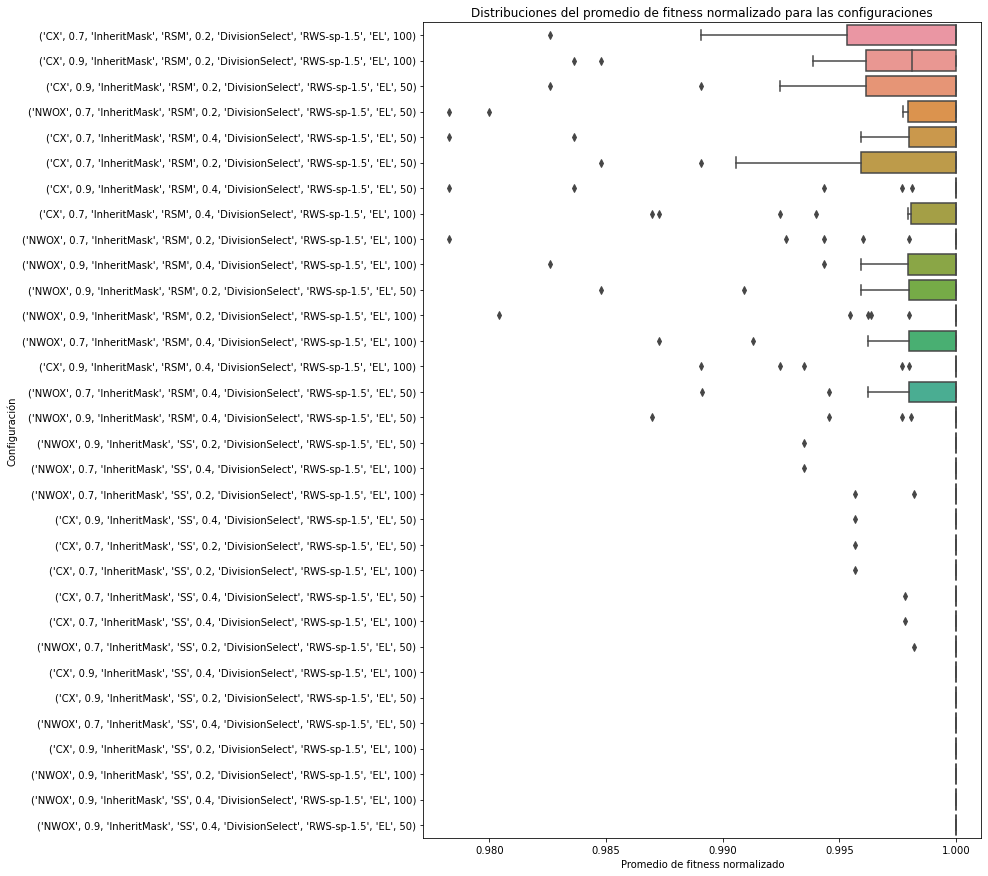

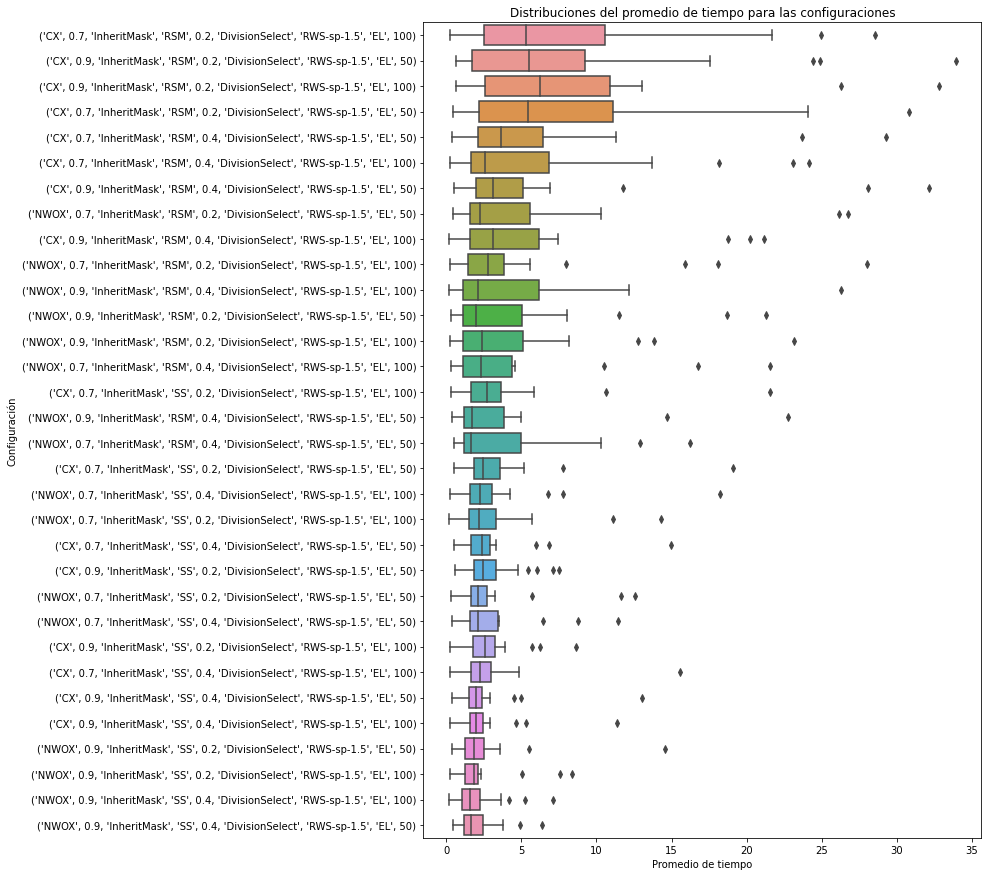

array(["('NWOX', 0.9, 'InheritMask', 'RSM', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)"],
      dtype=object)

In [ ]:
# selected
# pairs_best_in_nodiffs2

plot_sorted_distribution(fdata,"normalized_fitness",normal=False)
plot_sorted_distribution(fdata,"final_time",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(selected["configuration"])],"normalized_fitness",normal=False)

# plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"normalized_fitness",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"final_time",normal=False)
pd.unique(full_filtro["configuration"])

Mejor. ('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)

MBTI 40 5-5

In [ ]:
index = datalist_names.index("mbti-40-5to5")
fdata, idata = datalist_final[index],datalist_it[index]
pairs_best_in_nodiffs,selected,pairs_best_in_nodiffs2,full_filtro = analysis(fdata)

Fitness
Número de distribuciones no normales: 18 de 32
SpherResults(spher=True, W=inf, chi2=-inf, dof=495, pval=1.0)
Resultado Friedman fitness: p-value = 1.891816683555132e-16
Nemenyi-Friedman Post hoc
-----------------
Time
Número de distribuciones no normales: 28 de 32
SpherResults(spher=True, W=1.1568980772319022e-26, chi2=566.7117992802507, dof=495, pval=0.39601810674411325)
Resultado Friedman fitness: p-value = 1.2559953878321417e-51


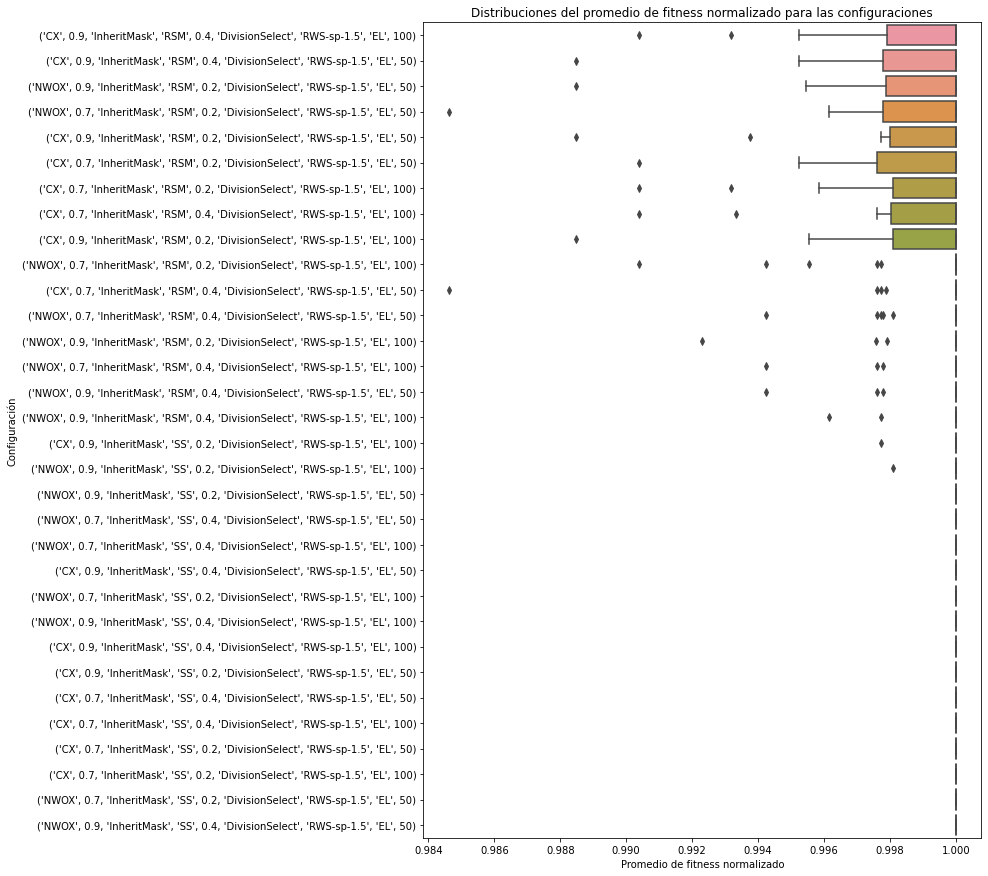

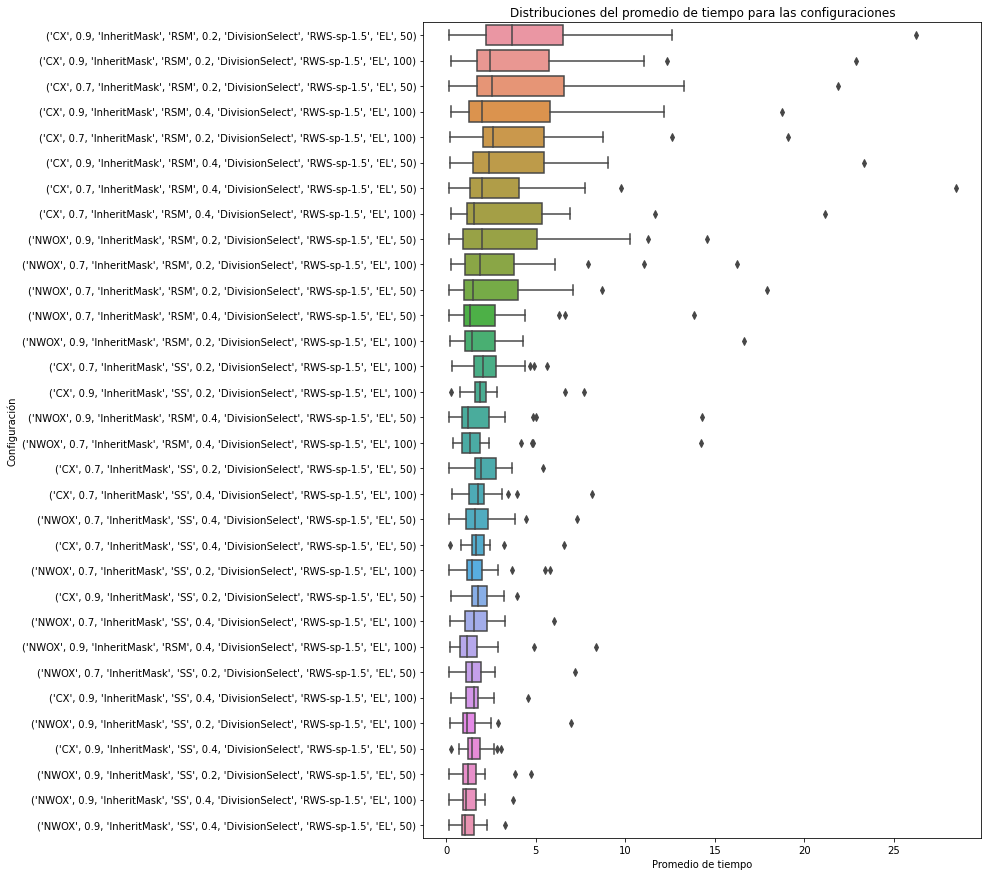

array(["('NWOX', 0.7, 'InheritMask', 'RSM', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'RSM', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'RSM', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)"],
      dtype=object)

In [ ]:
# selected
# pairs_best_in_nodiffs2

plot_sorted_distribution(fdata,"normalized_fitness",normal=False)
plot_sorted_distribution(fdata,"final_time",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(selected["configuration"])],"normalized_fitness",normal=False)

# plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"normalized_fitness",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"final_time",normal=False)
pd.unique(full_filtro["configuration"])

Mejor. ('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)

#### Belbin 60 3to3

In [8]:
index = datalist_names.index("belbin-60-3to3")
fdata, idata = datalist_final[index],datalist_it[index]
pairs_best_in_nodiffs,selected,pairs_best_in_nodiffs2,full_filtro = analysis(fdata)

Fitness
Número de distribuciones no normales: 16 de 32
SpherResults(spher=True, W=inf, chi2=-inf, dof=495, pval=1.0)
Resultado Friedman fitness: p-value = 1.678501256590309e-89
Wilcoxon post hoc
-----------------
Time
Número de distribuciones no normales: 1 de 7
SpherResults(spher=False, W=0.1429797907444959, chi2=34.57870190532258, dof=20, pval=0.024184175118707327)
Resultado Friedman fitness: p-value = 1.336043836564404e-14


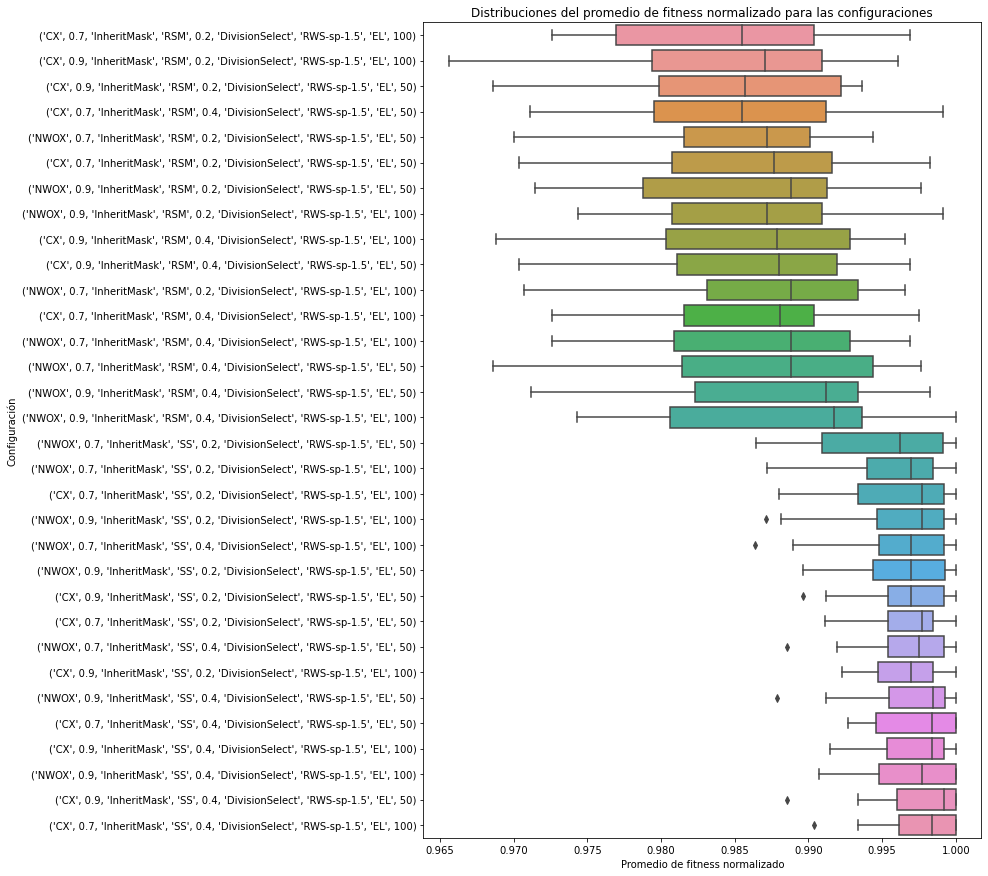

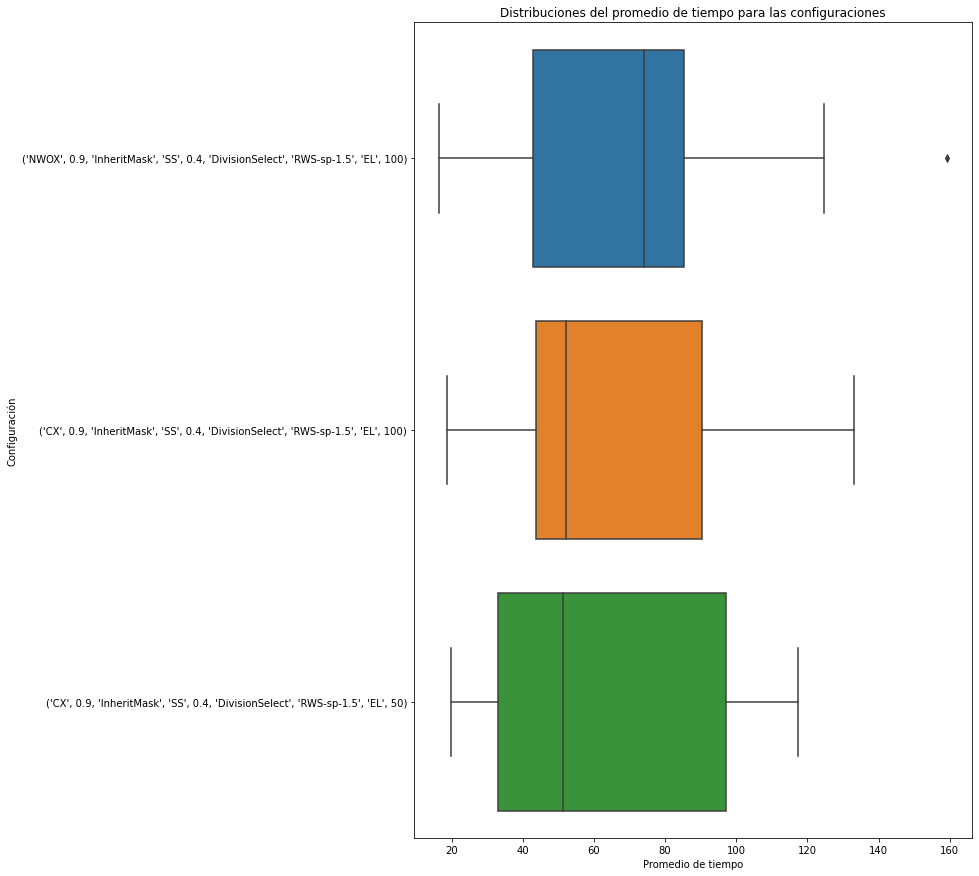

array(["('CX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('CX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)"],
      dtype=object)

In [12]:
# selected
# pairs_best_in_nodiffs2

plot_sorted_distribution(fdata,"normalized_fitness",normal=False)
# plot_sorted_distribution(fdata,"final_time",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(selected["configuration"])],"normalized_fitness",normal=False)

# plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"normalized_fitness",normal=False)
plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"final_time",normal=False)
pd.unique(full_filtro["configuration"])

In [ ]:
Mejor = ('CX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)

Belbin 60 4to4

In [13]:
index = datalist_names.index("belbin-60-4to4")
fdata, idata = datalist_final[index],datalist_it[index]
pairs_best_in_nodiffs,selected,pairs_best_in_nodiffs2,full_filtro = analysis(fdata)

Fitness
Número de distribuciones no normales: 17 de 32
SpherResults(spher=True, W=inf, chi2=-inf, dof=495, pval=1.0)
Resultado Friedman fitness: p-value = 9.471386344952051e-85
Wilcoxon post hoc
-----------------
Time
Número de distribuciones no normales: 2 de 12
SpherResults(spher=True, W=0.010403507204462025, chi2=73.6723802710273, dof=65, pval=0.26523986612631456)
Resultado Friedman fitness: p-value = 7.059685318842347e-22


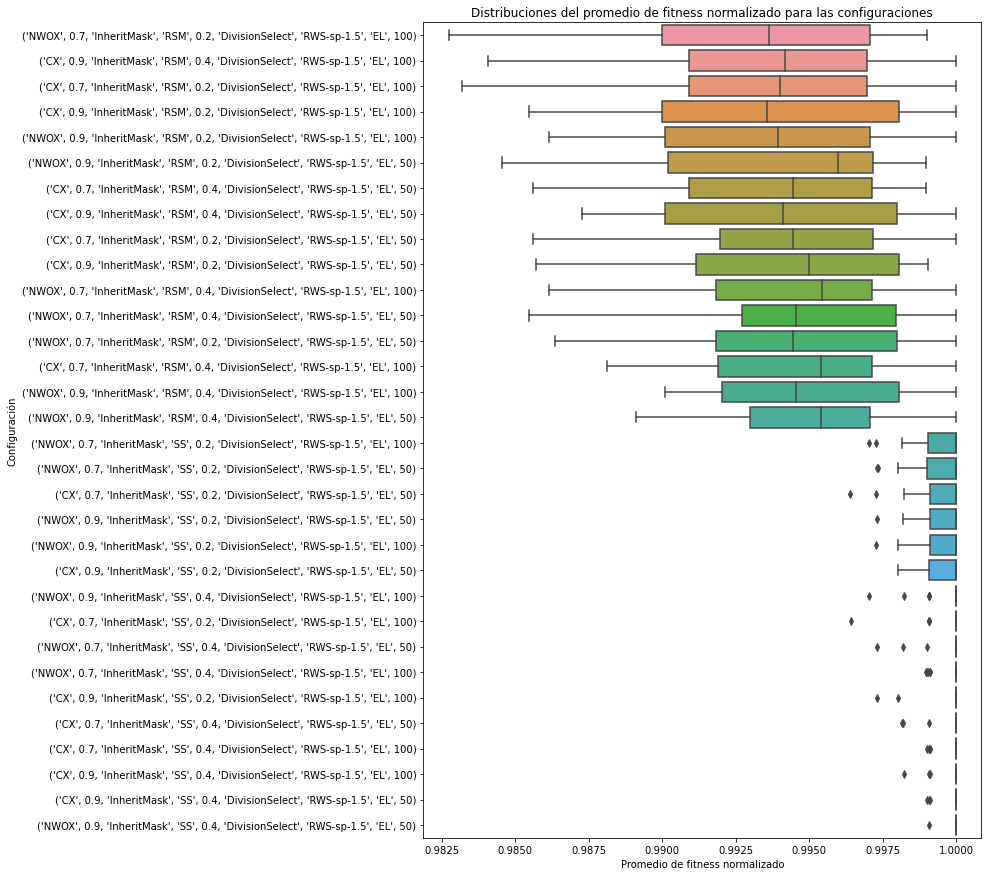

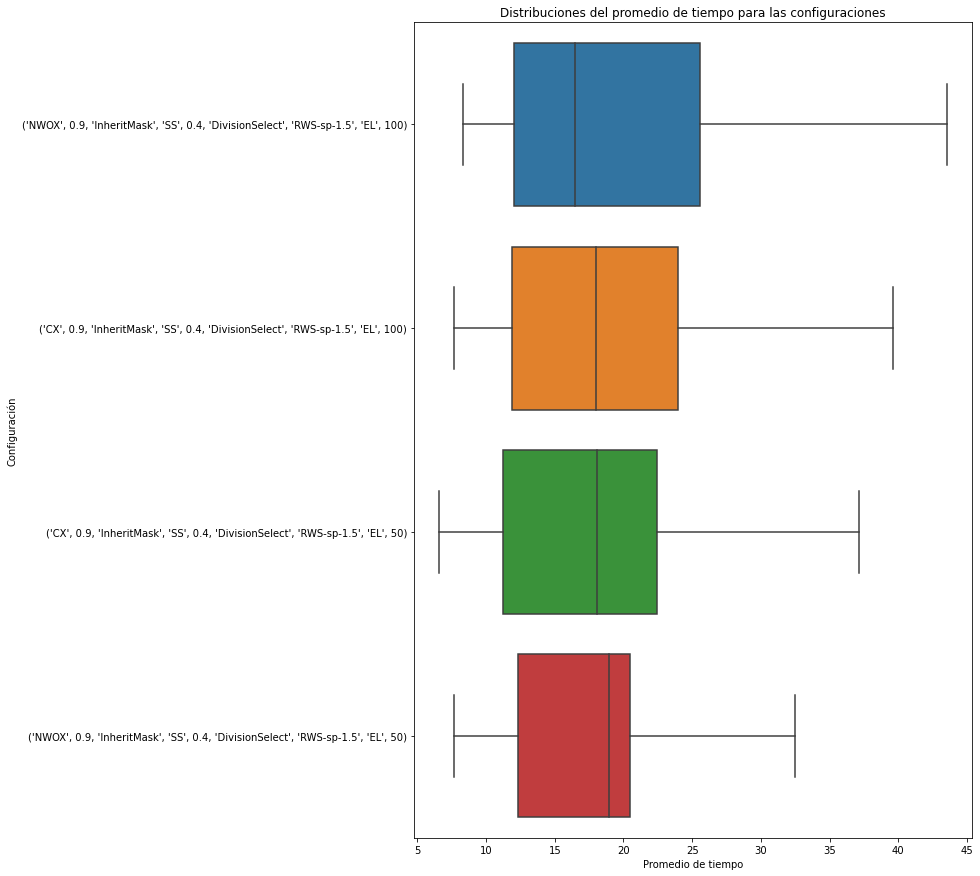

array(["('CX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('CX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)"],
      dtype=object)

In [14]:
# selected
# pairs_best_in_nodiffs2

plot_sorted_distribution(fdata,"normalized_fitness",normal=False)
# plot_sorted_distribution(fdata,"final_time",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(selected["configuration"])],"normalized_fitness",normal=False)

# plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"normalized_fitness",normal=False)
plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"final_time",normal=False)
pd.unique(full_filtro["configuration"])

Mejor: ('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)

MBTI 60 3to3

In [16]:
index = datalist_names.index("mbti-60-3to3")
fdata, idata = datalist_final[index],datalist_it[index]
pairs_best_in_nodiffs,selected,pairs_best_in_nodiffs2,full_filtro = analysis(fdata)

Fitness
Número de distribuciones no normales: 24 de 32
SpherResults(spher=True, W=inf, chi2=-inf, dof=495, pval=1.0)
Resultado Friedman fitness: p-value = 2.1227155515058122e-70
Wilcoxon post hoc
-----------------
Time
Número de distribuciones no normales: 5 de 10
SpherResults(spher=False, W=0.006089963120005437, chi2=85.67980964014912, dof=44, pval=0.0002635240850174)
Resultado Friedman fitness: p-value = 4.3115639189178686e-13


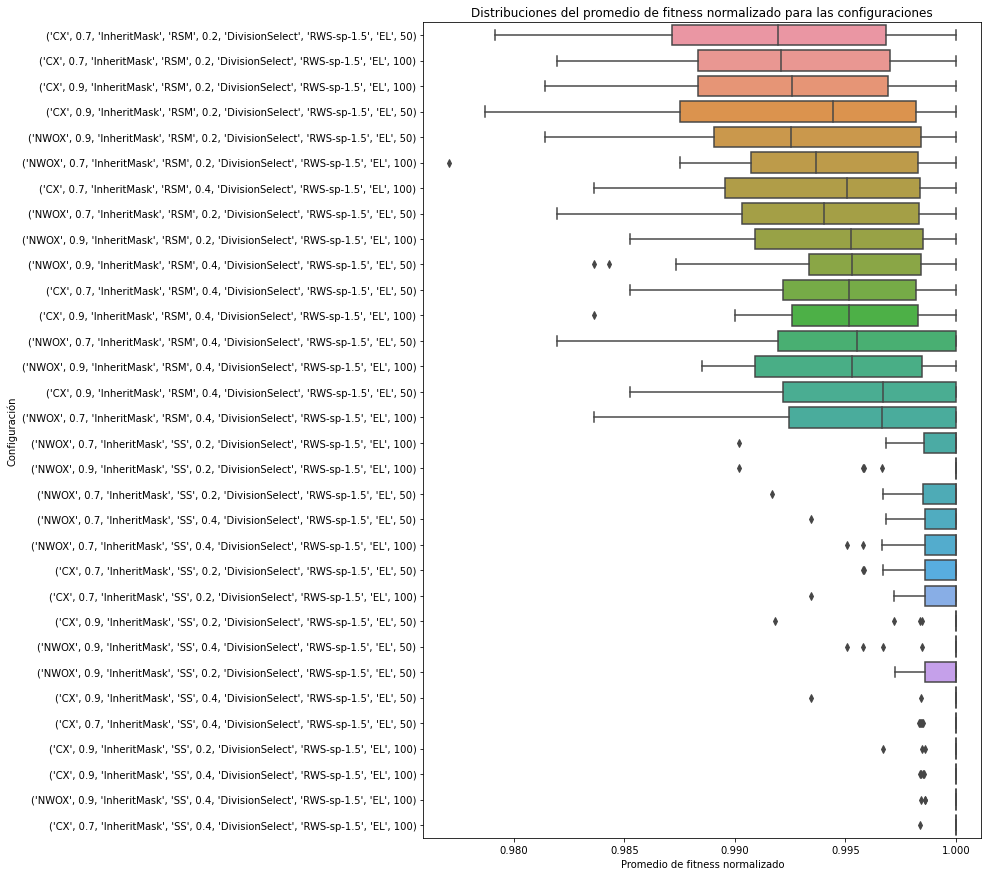

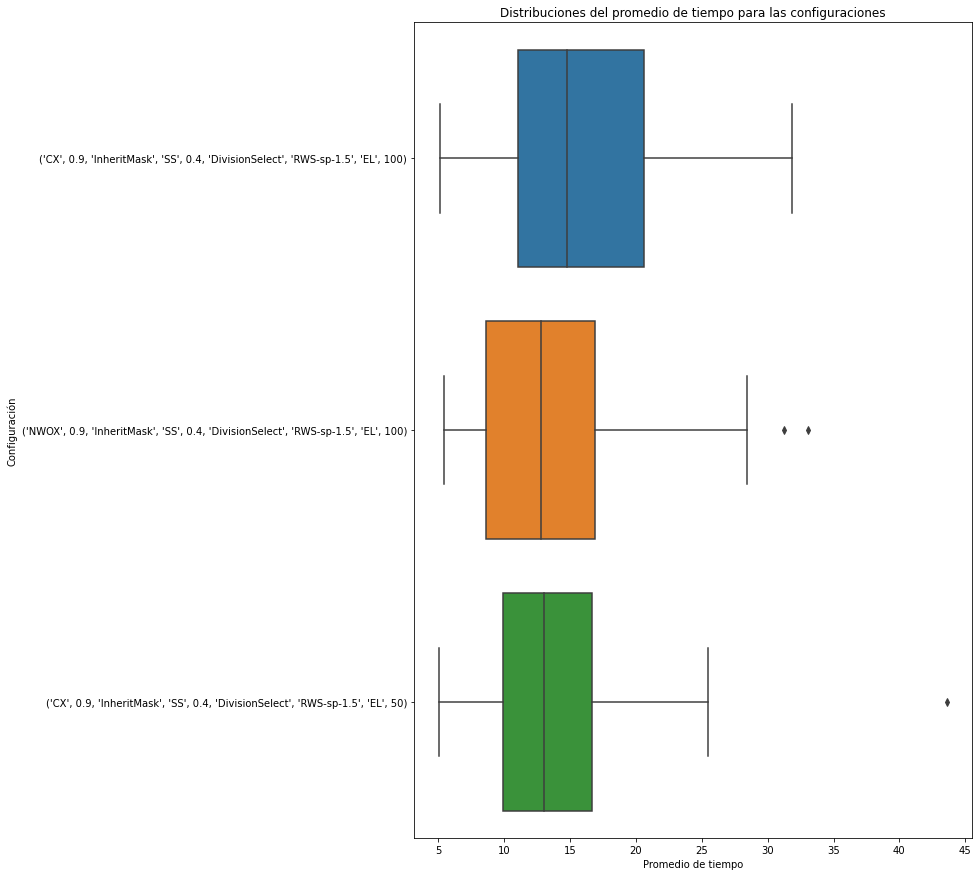

array(["('CX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('CX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)"],
      dtype=object)

In [17]:
# selected
# pairs_best_in_nodiffs2

plot_sorted_distribution(fdata,"normalized_fitness",normal=False)
# plot_sorted_distribution(fdata,"final_time",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(selected["configuration"])],"normalized_fitness",normal=False)

# plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"normalized_fitness",normal=False)
plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"final_time",normal=False)
pd.unique(full_filtro["configuration"])

Mejor: ('CX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)

MBTI 60 4TO4

In [18]:
index = datalist_names.index("mbti-60-4to4")
fdata, idata = datalist_final[index],datalist_it[index]
pairs_best_in_nodiffs,selected,pairs_best_in_nodiffs2,full_filtro = analysis(fdata)

Fitness
Número de distribuciones no normales: 19 de 32
SpherResults(spher=True, W=inf, chi2=-inf, dof=495, pval=1.0)
Resultado Friedman fitness: p-value = 2.660139892409763e-16
Nemenyi-Friedman Post hoc
-----------------
Time
Número de distribuciones no normales: 30 de 32
SpherResults(spher=False, W=1.478779020637967e-29, chi2=629.9318301146516, dof=495, pval=0.0018023160876040867)
Resultado Friedman fitness: p-value = 9.377362847176272e-60


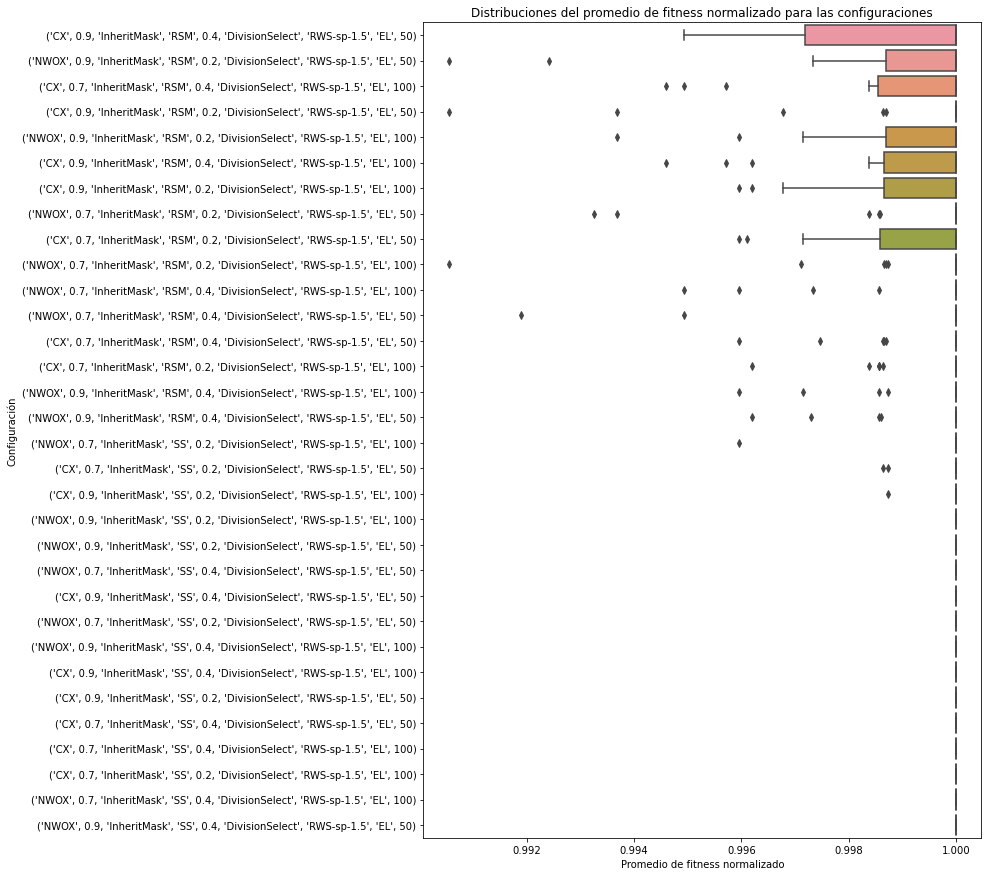

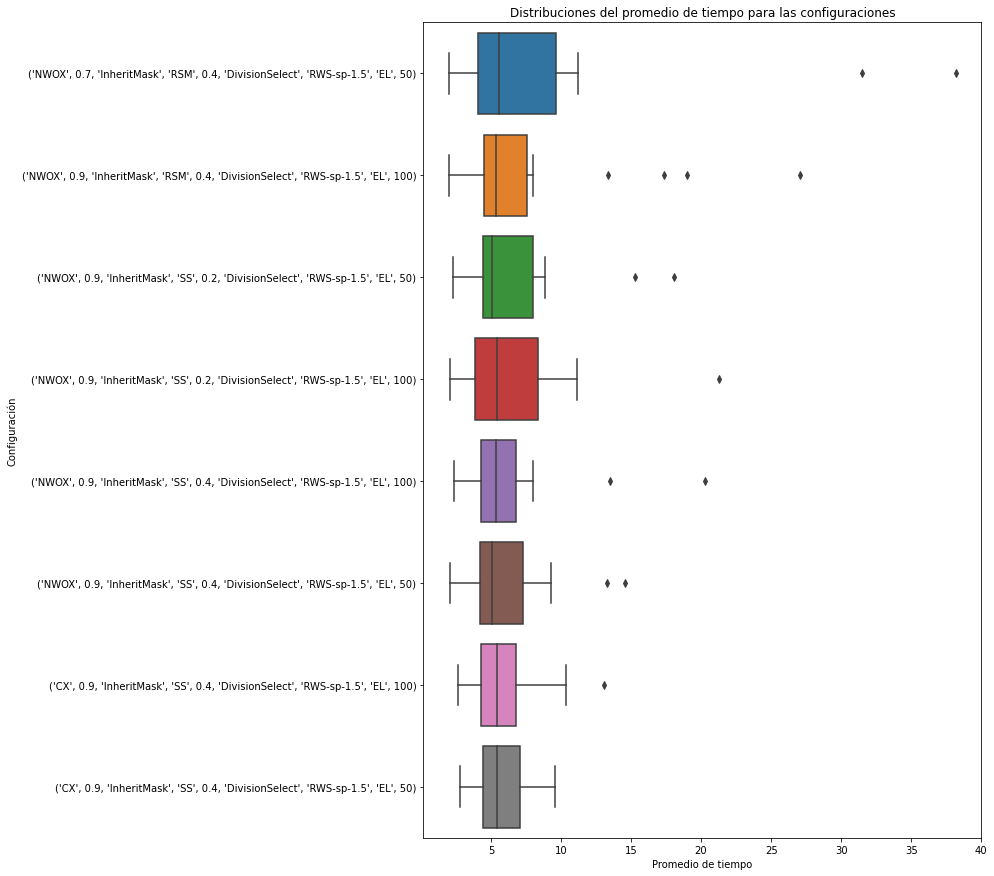

array(["('CX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('CX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.7, 'InheritMask', 'RSM', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.9, 'InheritMask', 'RSM', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100)",
       "('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)"],
      dtype=object)

In [19]:
# selected
# pairs_best_in_nodiffs2

plot_sorted_distribution(fdata,"normalized_fitness",normal=False)
# plot_sorted_distribution(fdata,"final_time",normal=False)
# plot_sorted_distribution(fdata[fdata["configuration"].isin(selected["configuration"])],"normalized_fitness",normal=False)

# plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"normalized_fitness",normal=False)
plot_sorted_distribution(fdata[fdata["configuration"].isin(full_filtro["configuration"])],"final_time",normal=False)
pd.unique(full_filtro["configuration"])

Mejor: ('CX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)

https://www.geeksforgeeks.org/how-to-perform-the-nemenyi-test-in-python/

https://open.spotify.com/playlist/37i9dQZF1EIWKv0rc7Coat?si=21cf4cfe427d4025 